In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("../mcats/data/normalized_data.csv")

In [3]:
data.head(3)

,Unnamed: 0,tempo,beats_mean,beats_var,zero_crossings_mean,zero_crossings_var,spectral_centroids_mean,spectral_centroids_var,spectral_rolloff_mean,spectral_rolloff_var,...,mfcc_36_var,mfcc_37_mean,mfcc_37_var,mfcc_38_mean,mfcc_38_var,mfcc_39_mean,mfcc_39_var,mfcc_40_mean,mfcc_40_var,genre
0,hiphop.00023.wav,-0.962068,-0.448284,-0.008626,0.071358,0.127249,0.052913,-0.546726,0.098794,-0.651427,...,0.069930,1.215868,0.213565,0.150391,-0.914619,0.903496,-0.556367,0.731643,0.137553,0
1,hiphop.00005.wav,-1.692588,-0.312625,0.037037,0.501715,0.555764,0.708033,-0.553414,0.776248,-0.948239,...,-0.710508,-0.472341,-0.981402,-0.839678,-0.871400,0.779845,-0.785982,0.176275,-0.885003,0
2,hiphop.00038.wav,2.325273,1.872180,-0.195345,-0.150793,-0.101815,0.008717,0.672371,-0.099242,1.035126,...,0.381241,1.888902,-0.215798,0.919960,-0.437188,-0.313291,0.113292,0.005978,-0.163482,0


In [4]:
data = data.drop("Unnamed: 0", axis =1)

In [5]:
X = data.drop(columns = "genre")
y = data["genre"]

Random forest is being used to prevent overcorrelation. The previous result should not affect the next results. So, it should give a more accurate prediction.

In [6]:
X.shape

(999, 89)

In [7]:
y.shape

(999,)

In [8]:
X.head()

,tempo,beats_mean,beats_var,zero_crossings_mean,zero_crossings_var,spectral_centroids_mean,spectral_centroids_var,spectral_rolloff_mean,spectral_rolloff_var,mfcc_1_mean,...,mfcc_36_mean,mfcc_36_var,mfcc_37_mean,mfcc_37_var,mfcc_38_mean,mfcc_38_var,mfcc_39_mean,mfcc_39_var,mfcc_40_mean,mfcc_40_var
0,-0.962068,-0.448284,-0.008626,0.071358,0.127249,0.052913,-0.546726,0.098794,-0.651427,1.039179,...,-0.066967,0.069930,1.215868,0.213565,0.150391,-0.914619,0.903496,-0.556367,0.731643,0.137553
1,-1.692588,-0.312625,0.037037,0.501715,0.555764,0.708033,-0.553414,0.776248,-0.948239,1.363807,...,-0.071785,-0.710508,-0.472341,-0.981402,-0.839678,-0.871400,0.779845,-0.785982,0.176275,-0.885003
2,2.325273,1.872180,-0.195345,-0.150793,-0.101815,0.008717,0.672371,-0.099242,1.035126,0.694514,...,2.747111,0.381241,1.888902,-0.215798,0.919960,-0.437188,-0.313291,0.113292,0.005978,-0.163482
3,0.133712,-0.055590,0.511061,0.332044,0.389219,0.653229,-0.328583,0.605684,-0.637163,0.392785,...,-0.400830,-0.722745,1.893764,-0.771913,2.538527,-0.656492,0.408874,-0.702733,-0.483230,-0.751796
4,0.595093,-0.128534,0.325394,-0.228270,-0.182964,-0.149396,-0.098469,0.005734,-0.088343,0.524726,...,-0.145860,-0.921582,0.040010,-0.643526,-0.971045,-0.232519,-0.095580,-0.410495,0.065700,-0.402656


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,)

In [65]:
y_train

778    7
286    2
165    1
960    9
493    4
      ..
106    1
270    2
860    8
435    4
102    1
Name: genre, Length: 799, dtype: int64

In [10]:
#The parenthesis are blank here because it will run the defaul values
model = RandomForestClassifier()  

In [11]:
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [12]:
preds

array([3, 8, 6, 4, 8, 7, 3, 3, 0, 5, 8, 7, 1, 5, 6, 0, 1, 8, 3, 0, 2, 5,
       7, 9, 6, 9, 1, 2, 7, 0, 4, 1, 4, 9, 8, 8, 8, 3, 9, 8, 2, 4, 5, 3,
       6, 8, 9, 4, 0, 8, 4, 4, 9, 0, 1, 6, 4, 2, 7, 0, 1, 9, 4, 9, 6, 6,
       7, 1, 5, 5, 1, 9, 6, 3, 7, 7, 8, 6, 0, 1, 4, 9, 5, 4, 3, 0, 8, 9,
       4, 0, 7, 5, 8, 8, 4, 6, 7, 4, 5, 0, 1, 3, 3, 1, 2, 1, 7, 2, 1, 6,
       2, 4, 1, 4, 8, 4, 4, 0, 2, 8, 7, 6, 1, 4, 6, 2, 8, 9, 7, 8, 8, 1,
       0, 0, 6, 7, 5, 0, 7, 1, 9, 9, 1, 4, 9, 7, 6, 1, 6, 1, 0, 3, 6, 8,
       8, 1, 4, 3, 9, 2, 1, 3, 2, 5, 7, 8, 0, 2, 8, 4, 8, 7, 6, 8, 1, 2,
       2, 8, 5, 9, 3, 0, 2, 3, 6, 5, 4, 8, 8, 5, 4, 4, 2, 5, 4, 5, 6, 3,
       6, 8, 5, 0, 8, 7, 0, 4, 0, 2, 3, 8, 2, 7, 0, 5, 7, 0, 0, 3, 0, 5,
       8, 5, 0, 1, 6, 6, 0, 6, 0, 4, 7, 1, 9, 9, 9, 8, 2, 5, 9, 5, 8, 0,
       6, 8, 9, 1, 0, 0, 0, 7])

In [13]:
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_test
y_pred = preds
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.59      0.70      0.64        27
   classical       0.77      0.80      0.78        25
       blues       0.74      0.67      0.70        21
       metal       0.89      0.80      0.84        20
        jazz       0.79      0.79      0.79        28
     country       0.64      0.67      0.65        21
         pop       0.84      0.70      0.76        30
        rock       0.48      0.44      0.46        25
       disco       0.37      0.59      0.46        22
      reggae       0.68      0.48      0.57        31

    accuracy                           0.66       250
   macro avg       0.68      0.66      0.67       250
weighted avg       0.68      0.66      0.66       250



In [14]:
r2_score(y_true, preds)

0.034335956604864326

In [15]:
param_grid = {
  
    'n_estimators': [100, 200, 300, 1000]
}

In [16]:
random_forest_model = RandomForestRegressor()
# Looking for best parameters for the random forest model
grid_search = GridSearchCV(estimator = random_forest_model , param_grid = param_grid, cv = 5, n_jobs = -1)

In [17]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 1000]})

In [18]:
grid_search.best_score_

0.34233946617753486

In [19]:
grid_search.best_params_

{'n_estimators': 200}

In [20]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [45]:
#Using the recommended best paramters to create a new model
model_2 = RandomForestClassifier(n_estimators=300)  
model_2.fit(X_train, y_train)
preds_2 = model_2.predict(X_test)
y_true = y_test
y_pred = preds_2
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.57      0.59      0.58        27
   classical       0.75      0.84      0.79        25
       blues       0.73      0.76      0.74        21
       metal       0.94      0.85      0.89        20
        jazz       0.85      0.82      0.84        28
     country       0.70      0.67      0.68        21
         pop       0.92      0.80      0.86        30
        rock       0.63      0.48      0.55        25
       disco       0.33      0.59      0.43        22
      reggae       0.65      0.48      0.56        31

    accuracy                           0.68       250
   macro avg       0.71      0.69      0.69       250
weighted avg       0.71      0.68      0.69       250



In [25]:
r2_score(y_true, preds_2)

-0.020778681843107494

In [26]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [27]:
#The most important parameters are n_estimators and max_features. Best params from the previous search were 300 for n estimators
#that might have been because I limited the area the grid search was looking at.
# Max features as log2 and squareroot as those were two of the three 
#gini or entropy for classfication. Entropy is computationally more expensive. 
#Other values were set because of scikit learn recommendations
#oob score to remove generalization errors.
model_parameters = { 'n_estimators': randint(200,1000),
                    'max_features': ['auto', 'sqrt'],
                    'bootstrap' :[True],
                    'oob_score':[True]
                   }
random_search= RandomizedSearchCV(model, model_parameters, n_iter=100, cv=5, random_state=1, verbose=2)

model =random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_features=sqrt, n_estimators=435, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=435, oob_score=True; total time=   3.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=435, oob_score=True; total time=   3.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=435, oob_score=True; total time=   2.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=435, oob_score=True; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=272, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=272, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=272, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=272, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=272, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=915, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=915, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=915, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=915, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=915, oob_score=True; total time=   4.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=344, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=344, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=344, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=344, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=481, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=481, oob_score=True; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=481, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=481, oob_score=True; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=481, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=476, oob_score=True; total time=   2.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=476, oob_score=True; total time=   3.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=476, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=476, oob_score=True; total time=   4.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=476, oob_score=True; total time=   3.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=557, oob_score=True; total time=   4.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=557, oob_score=True; total time=   4.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=557, oob_score=True; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=557, oob_score=True; total time=   2.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=557, oob_score=True; total time=   2.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=668, oob_score=True; total time=   3.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=668, oob_score=True; total time=   3.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=668, oob_score=True; total time=   3.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=668, oob_score=True; total time=   3.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=668, oob_score=True; total time=   3.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=452, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=452, oob_score=True; total time=   2.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=452, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=452, oob_score=True; total time=   2.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=452, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=868, oob_score=True; total time=   4.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=868, oob_score=True; total time=   4.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=868, oob_score=True; total time=   4.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=868, oob_score=True; total time=   4.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=868, oob_score=True; total time=   3.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=598, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=598, oob_score=True; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=598, oob_score=True; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=598, oob_score=True; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=598, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=780, oob_score=True; total time=   3.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=780, oob_score=True; total time=   3.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=780, oob_score=True; total time=   3.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=780, oob_score=True; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=780, oob_score=True; total time=   3.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=953, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=953, oob_score=True; total time=   4.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=953, oob_score=True; total time=   4.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=953, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=953, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=678, oob_score=True; total time=   3.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=678, oob_score=True; total time=   3.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=678, oob_score=True; total time=   3.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=678, oob_score=True; total time=   3.0s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=286, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=286, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=286, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=286, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=286, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=593, oob_score=True; total time=   2.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=593, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=593, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=593, oob_score=True; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=593, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=519, oob_score=True; total time=   2.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=519, oob_score=True; total time=   2.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=519, oob_score=True; total time=   2.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=519, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=516, oob_score=True; total time=   3.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=516, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=516, oob_score=True; total time=   2.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=516, oob_score=True; total time=   2.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=516, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=464, oob_score=True; total time=   2.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=464, oob_score=True; total time=   2.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=464, oob_score=True; total time=   2.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=464, oob_score=True; total time=   2.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=464, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=853, oob_score=True; total time=   4.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=853, oob_score=True; total time=   4.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=853, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=853, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=853, oob_score=True; total time=   4.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=631, oob_score=True; total time=   3.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=631, oob_score=True; total time=   3.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=631, oob_score=True; total time=   4.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=631, oob_score=True; total time=   3.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=631, oob_score=True; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=833, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=833, oob_score=True; total time=   4.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=833, oob_score=True; total time=   4.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=833, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=833, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=742, oob_score=True; total time=   4.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=742, oob_score=True; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=742, oob_score=True; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=742, oob_score=True; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=742, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=587, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=587, oob_score=True; total time=   3.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=587, oob_score=True; total time=   3.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=587, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=587, oob_score=True; total time=   3.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=761, oob_score=True; total time=   3.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=761, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=761, oob_score=True; total time=   4.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=761, oob_score=True; total time=   4.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=761, oob_score=True; total time=   3.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=715, oob_score=True; total time=   3.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=715, oob_score=True; total time=   4.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=715, oob_score=True; total time=   4.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=715, oob_score=True; total time=   5.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=715, oob_score=True; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=992, oob_score=True; total time=   5.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=992, oob_score=True; total time=   5.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=992, oob_score=True; total time=   5.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=992, oob_score=True; total time=   4.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=992, oob_score=True; total time=   5.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=243, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=243, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=243, oob_score=True; total time=   2.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=243, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=243, oob_score=True; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=226, oob_score=True; total time=   2.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=226, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=226, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=226, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=226, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=536, oob_score=True; total time=   2.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=536, oob_score=True; total time=   2.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=536, oob_score=True; total time=   2.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=536, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=536, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=497, oob_score=True; total time=   3.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=497, oob_score=True; total time=   2.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=497, oob_score=True; total time=   3.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=497, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=497, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=396, oob_score=True; total time=   3.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=396, oob_score=True; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=396, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=396, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=396, oob_score=True; total time=   2.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=567, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=567, oob_score=True; total time=   4.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=567, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=567, oob_score=True; total time=   3.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=567, oob_score=True; total time=   3.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=671, oob_score=True; total time=   3.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=671, oob_score=True; total time=   3.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=671, oob_score=True; total time=   3.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=671, oob_score=True; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=671, oob_score=True; total time=   3.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=482, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=482, oob_score=True; total time=   3.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=482, oob_score=True; total time=   5.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=482, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=482, oob_score=True; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=816, oob_score=True; total time=   4.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=816, oob_score=True; total time=   4.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=816, oob_score=True; total time=   5.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=816, oob_score=True; total time=   5.2s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=977, oob_score=True; total time=   5.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=977, oob_score=True; total time=   5.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=977, oob_score=True; total time=   5.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=977, oob_score=True; total time=   4.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=977, oob_score=True; total time=   4.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=326, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=326, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=326, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=326, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=326, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=581, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=581, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=581, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=581, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=355, oob_score=True; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=355, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=355, oob_score=True; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=355, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=355, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=513, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=513, oob_score=True; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=513, oob_score=True; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=513, oob_score=True; total time=   3.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=513, oob_score=True; total time=   3.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=366, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=366, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=366, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=366, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=488, oob_score=True; total time=   2.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=488, oob_score=True; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=488, oob_score=True; total time=   2.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=488, oob_score=True; total time=   2.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=488, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=978, oob_score=True; total time=   6.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=978, oob_score=True; total time=   6.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=978, oob_score=True; total time=   5.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=978, oob_score=True; total time=   4.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=978, oob_score=True; total time=   4.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=855, oob_score=True; total time=   4.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=855, oob_score=True; total time=   3.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=855, oob_score=True; total time=   4.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=855, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=855, oob_score=True; total time=   4.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=287, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=287, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=287, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=287, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=786, oob_score=True; total time=   4.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=786, oob_score=True; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=786, oob_score=True; total time=   3.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=786, oob_score=True; total time=   4.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=786, oob_score=True; total time=   3.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=502, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=502, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=502, oob_score=True; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=502, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=502, oob_score=True; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=928, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=928, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=928, oob_score=True; total time=   4.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=928, oob_score=True; total time=   5.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=928, oob_score=True; total time=   4.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=895, oob_score=True; total time=   4.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=895, oob_score=True; total time=   4.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=895, oob_score=True; total time=   4.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=895, oob_score=True; total time=   5.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=895, oob_score=True; total time=   4.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=569, oob_score=True; total time=   3.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=569, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=569, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=569, oob_score=True; total time=   3.1s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=453, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=453, oob_score=True; total time=   2.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=453, oob_score=True; total time=   2.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=453, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=453, oob_score=True; total time=   2.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=974, oob_score=True; total time=   5.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=974, oob_score=True; total time=   8.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=974, oob_score=True; total time=   5.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=974, oob_score=True; total time=   4.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=974, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=669, oob_score=True; total time=   3.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=669, oob_score=True; total time=   3.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=669, oob_score=True; total time=   3.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=669, oob_score=True; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=669, oob_score=True; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=714, oob_score=True; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=714, oob_score=True; total time=   3.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=714, oob_score=True; total time=   3.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=714, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=714, oob_score=True; total time=   3.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=349, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=349, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=349, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=349, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=349, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=463, oob_score=True; total time=   2.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=463, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=463, oob_score=True; total time=   2.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=463, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=463, oob_score=True; total time=   2.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=912, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=912, oob_score=True; total time=   4.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=912, oob_score=True; total time=   4.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=912, oob_score=True; total time=   4.3s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=748, oob_score=True; total time=   7.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=748, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=748, oob_score=True; total time=   4.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=748, oob_score=True; total time=   5.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=748, oob_score=True; total time=   3.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=975, oob_score=True; total time=   4.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=975, oob_score=True; total time=   5.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=975, oob_score=True; total time=   4.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=975, oob_score=True; total time=   4.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=975, oob_score=True; total time=   4.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=769, oob_score=True; total time=   3.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=769, oob_score=True; total time=   3.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=769, oob_score=True; total time=   3.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=769, oob_score=True; total time=   3.5s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=708, oob_score=True; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=708, oob_score=True; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=708, oob_score=True; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=708, oob_score=True; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=708, oob_score=True; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=296, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=296, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=296, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=296, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=296, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=210, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=210, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=210, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=210, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=210, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=676, oob_score=True; total time=   3.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=676, oob_score=True; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=676, oob_score=True; total time=   3.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=676, oob_score=True; total time=   3.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=676, oob_score=True; total time=   3.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=616, oob_score=True; total time=   2.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=616, oob_score=True; total time=   2.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=616, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=616, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=616, oob_score=True; total time=   2.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=393, oob_score=True; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=393, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=393, oob_score=True; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=393, oob_score=True; total time=   2.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=393, oob_score=True; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=772, oob_score=True; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=772, oob_score=True; total time=   5.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=772, oob_score=True; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=772, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=772, oob_score=True; total time=   3.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=352, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=330, oob_score=True; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=330, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=330, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=330, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=330, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=932, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=932, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=932, oob_score=True; total time=   5.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=932, oob_score=True; total time=   5.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=932, oob_score=True; total time=   4.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=466, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=466, oob_score=True; total time=   2.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=466, oob_score=True; total time=   2.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=466, oob_score=True; total time=   2.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=466, oob_score=True; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=689, oob_score=True; total time=   3.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=689, oob_score=True; total time=   3.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=689, oob_score=True; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=689, oob_score=True; total time=   3.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=689, oob_score=True; total time=   3.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=670, oob_score=True; total time=   3.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=670, oob_score=True; total time=   3.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=670, oob_score=True; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=670, oob_score=True; total time=   4.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=670, oob_score=True; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=906, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=906, oob_score=True; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=906, oob_score=True; total time=   4.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=906, oob_score=True; total time=   4.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=906, oob_score=True; total time=   4.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=376, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=376, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=376, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=376, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=376, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=215, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=601, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=601, oob_score=True; total time=   2.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=601, oob_score=True; total time=   2.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=601, oob_score=True; total time=   2.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=601, oob_score=True; total time=   2.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=220, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=220, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=220, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=220, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=220, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=478, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=478, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=478, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=478, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=478, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=826, oob_score=True; total time=   3.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=826, oob_score=True; total time=   3.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=826, oob_score=True; total time=   3.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=826, oob_score=True; total time=   3.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=826, oob_score=True; total time=   3.5s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=893, oob_score=True; total time=   3.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=893, oob_score=True; total time=   3.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=893, oob_score=True; total time=   3.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=893, oob_score=True; total time=   3.8s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=210, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=210, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=210, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=210, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=210, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=383, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=383, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=383, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=383, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=383, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=768, oob_score=True; total time=   3.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=768, oob_score=True; total time=   3.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=768, oob_score=True; total time=   3.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=768, oob_score=True; total time=   3.3s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=768, oob_score=True; total time=   3.4s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=605, oob_score=True; total time=   3.2s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=605, oob_score=True; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=605, oob_score=True; total time=   3.6s
[CV] END bootstrap=True, max_features=sqrt, n_estimators=605, oob_score=True; total time=   2.9s
[CV] END bootstrap=True, max_f

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=828, oob_score=True; total time=   4.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=828, oob_score=True; total time=   4.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=828, oob_score=True; total time=   4.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=828, oob_score=True; total time=   5.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_features=auto, n_estimators=828, oob_score=True; total time=   5.0s


In [28]:
random_search.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 341,
 'oob_score': True}

In [43]:
model_7 = RandomForestClassifier(n_estimators=341, max_features='sqrt')  
model_7.fit(X_train, y_train)
preds_7 = model_7.predict(X_test)
y_true = y_test
y_pred = preds_7
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.62      0.59      0.60        27
   classical       0.74      0.92      0.82        25
       blues       0.75      0.71      0.73        21
       metal       0.94      0.80      0.86        20
        jazz       0.96      0.79      0.86        28
     country       0.70      0.67      0.68        21
         pop       0.85      0.77      0.81        30
        rock       0.50      0.48      0.49        25
       disco       0.39      0.64      0.48        22
      reggae       0.62      0.52      0.56        31

    accuracy                           0.68       250
   macro avg       0.71      0.69      0.69       250
weighted avg       0.71      0.68      0.69       250



"The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default)," which implies that bootstrap=False draws a sample of size equal to the number of training examples without replacement, i.e. the same training set is always used.

In [44]:
model_3 = RandomForestClassifier(n_estimators=828, max_features='auto')  
model_3.fit(X_train, y_train)
preds_3 = model_3.predict(X_test)
y_true = y_test
y_pred = preds_3
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

      hiphop       0.58      0.56      0.57        27
   classical       0.75      0.84      0.79        25
       blues       0.71      0.71      0.71        21
       metal       0.94      0.80      0.86        20
        jazz       0.81      0.79      0.80        28
     country       0.72      0.62      0.67        21
         pop       0.85      0.77      0.81        30
        rock       0.55      0.44      0.49        25
       disco       0.33      0.64      0.44        22
      reggae       0.62      0.48      0.55        31

    accuracy                           0.66       250
   macro avg       0.69      0.66      0.67       250
weighted avg       0.69      0.66      0.67       250



In [53]:
model_3 = RandomForestClassifier(n_estimators=828, max_features='auto')  
model_3.fit(X_train, y_train)
preds_3 = model_3.predict(X_train)
y_true = y_train
y_pred = preds_3
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

      hiphop       1.00      1.00      1.00        73
   classical       1.00      1.00      1.00        75
       blues       1.00      1.00      1.00        79
       metal       0.99      1.00      0.99        80
        jazz       1.00      1.00      1.00        71
     country       1.00      1.00      1.00        79
         pop       1.00      1.00      1.00        70
        rock       1.00      0.99      0.99        75
       disco       1.00      1.00      1.00        78
      reggae       1.00      1.00      1.00        69

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749



In [46]:
#using recommended features from random grid search
model_4 = RandomForestClassifier(n_estimators=355, max_features='auto')  
model_4.fit(X_train, y_train)
preds_4 = model_4.predict(X_test)
y_true = y_test
y_pred = preds_4
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

      hiphop       0.59      0.63      0.61        27
   classical       0.70      0.84      0.76        25
       blues       0.62      0.71      0.67        21
       metal       0.94      0.80      0.86        20
        jazz       0.88      0.75      0.81        28
     country       0.68      0.62      0.65        21
         pop       0.82      0.77      0.79        30
        rock       0.61      0.44      0.51        25
       disco       0.35      0.64      0.45        22
      reggae       0.67      0.45      0.54        31

    accuracy                           0.66       250
   macro avg       0.69      0.66      0.67       250
weighted avg       0.69      0.66      0.67       250



In [52]:
model_4 = RandomForestClassifier(n_estimators=355, max_features='auto')  
model_4.fit(X_train, y_train)
preds_4 = model_4.predict(X_train)
y_true = y_train
y_pred = preds_4
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

      hiphop       1.00      1.00      1.00        73
   classical       1.00      1.00      1.00        75
       blues       1.00      1.00      1.00        79
       metal       0.99      1.00      0.99        80
        jazz       1.00      1.00      1.00        71
     country       1.00      1.00      1.00        79
         pop       1.00      1.00      1.00        70
        rock       1.00      0.99      0.99        75
       disco       1.00      1.00      1.00        78
      reggae       1.00      1.00      1.00        69

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749



Use more parameters for the next model besides n_estimators and max features. Also, start the random integer from 5. 100 or 200 might have been too big. After training this. Look into ensemble methods with knn in addition to the random forest classifier.

In [33]:
model = RandomForestClassifier(n_jobs =-1)  
model_parameters = { 'n_estimators': randint(1,1000),
                    'criterion': ['gini', 'entropy', 'log_loss'],
                    'max_features': ['auto', 'sqrt', 'log2', None],
                    'max_depth' : randint(1,32),
                    'min_samples_split':randint(2, 100), 
                   }
random_search= RandomizedSearchCV(model, model_parameters, n_iter=100, cv=5, random_state=1, verbose=2)

model =random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=74, n_estimators=768; total time=   6.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=74, n_estimators=768; total time=   2.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=74, n_estimators=768; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=74, n_estimators=768; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=74, n_estimators=768; total time=   2.4s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=81, n_estimators=961; total time=   2.4s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=81, n_estimators=961; total time=   2.3s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=81, n_estimators=961; total time=   2.2s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=81, n_estimators=961; total time=   2.2s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_split=81, n_estimators=961; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=73, n_estimators=750; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=73, n_estimators=750; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=73, n_estimators=750; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=73, n_estimators=750; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=73, n_estimators=750; total time=   1.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=52, n_estimators=277; total time=   0.6s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=52, n_estimators=277; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=52, n_estimators=277; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=52, n_estimators=277; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_split=52, n_estimators=277; total time=   0.6s
[CV] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_split=86, n_estimators=908; total time=   1.9s
[CV] END criterion=log_loss, max_depth=6, max_features=log2, min_samples_split=86, n_estimators=908; total time=   1.8s
[CV] END criterion=log_loss, max_depth=6, max_features=log2, min

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=31, n_estimators=399; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=31, n_estimators=399; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=31, n_estimators=399; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=31, n_estimators=399; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=31, n_estimators=399; total time=   0.8s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=89, n_estimators=754; total time=   7.3s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=89, n_estimators=754; total time=   8.5s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=89, n_estimators=754; total time=   7.5s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=89, n_estimators=754; total time=   7.9s
[CV] END criterion=log_loss, max_depth=5, max_features=None, min_samples_split=89, n_estimators=754; total time=   7.3s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, min_samples_split=15, n_estimators=394; total time=   0.6s
[CV] END criterion=log_loss, max_depth=1, max_features=log2, min_samples_split=15, n_estimators=394; total time=   0.6s
[CV] END criterion=log_loss, max_depth=1, m

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_split=90, n_estimators=654; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_split=90, n_estimators=654; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_split=90, n_estimators=654; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_split=90, n_estimators=654; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=18, max_features=auto, min_samples_split=90, n_estimators=654; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=32, n_estimators=72; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=32, n_estimators=72; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=32, n_estimators=72; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=32, n_estimators=72; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=32, n_estimators=72; total time=   0.3s
[CV] END criterion=log_loss, max_depth=22, max_features=sqrt, min_samples_split=59, n_estimators=516; total time=   1.4s
[CV] END criterion=log_loss, max_depth=22, max_features=sqrt, min_samples_split=59, n_estimators=516; total time=   1.4s
[CV] END criterion=log_loss, max_depth=22, max_features=sqrt, min_samples_split=59, n_estimators=516; total time=   1.4s
[CV] END criterion=log_loss, max_depth=22, max_features=sqrt, min_samples_split=59, n_estimators=516; total time=   1.4s
[CV] END criterion=log_loss, max_depth=22, max_features=sqrt, min_samples_split=59, n_estimators=516; total time=   1.4s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=45, n_estimators=589; total time=   1.3s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_split=45, n_estimators=589; total time=   1.3s
[CV] END criterion=gini, max_depth=25, ma

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=21, max_features=auto, min_samples_split=43, n_estimators=467; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=21, max_features=auto, min_samples_split=43, n_estimators=467; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=21, max_features=auto, min_samples_split=43, n_estimators=467; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=21, max_features=auto, min_samples_split=43, n_estimators=467; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=21, max_features=auto, min_samples_split=43, n_estimators=467; total time=   1.5s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=89, n_estimators=904; total time=   1.9s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=89, n_estimators=904; total time=   1.9s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=89, n_estimators=904; total time=   1.9s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=89, n_estimators=904; total time=   1.8s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=89, n_estimators=904; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=24, n_estimators=778; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=24, n_estimators=778; total time=   2.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=24, n_estimators=778; total time=   2.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=24, n_estimators=778; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=26, max_features=auto, min_samples_split=24, n_estimators=778; total time=   2.5s
[CV] END criterion=log_loss, max_depth=24, max_features=sqrt, min_samples_split=29, n_estimators=934; total time=   2.8s
[CV] END criterion=log_loss, max_depth=24, max_features=sqrt, min_samples_split=29, n_estimators=934; total time=   2.7s
[CV] END criterion=log_loss, max_depth=24, max_features=sqrt, min_samples_split=29, n_estimators=934; total time=   2.8s
[CV] END criterion=log_loss, max_depth=24, max_features=sqrt, min_samples_split=29, n_estimators=934; total time=   2.8s
[CV] END criterion=log_loss, max_depth=24, max_features=sqrt, min_samples_split=29, n_estimators=934; total time=   2.8s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=10, n_estimators=289; total time=   0.8s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=10, n_estimators=289; total time=   0.8s
[CV] END criterion=entropy, max_de

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=15, max_features=auto, min_samples_split=90, n_estimators=152; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=15, max_features=auto, min_samples_split=90, n_estimators=152; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=15, max_features=auto, min_samples_split=90, n_estimators=152; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=15, max_features=auto, min_samples_split=90, n_estimators=152; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=15, max_features=auto, min_samples_split=90, n_estimators=152; total time=   0.4s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_split=5, n_estimators=897; total time=   2.7s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_split=5, n_estimators=897; total time=   2.7s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_split=5, n_estimators=897; total time=   2.8s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_split=5, n_estimators=897; total time=   2.9s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_split=5, n_estimators=897; total time=   2.8s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=565; total time=   1.3s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=565; total time=   1.3s
[CV] END criterion=gini, max_depth=30, max_features=

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=32, n_estimators=549; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=32, n_estimators=549; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=32, n_estimators=549; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=32, n_estimators=549; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=32, n_estimators=549; total time=   1.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=84, n_estimators=97; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=84, n_estimators=97; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=84, n_estimators=97; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=84, n_estimators=97; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_split=84, n_estimators=97; total time=   0.3s
[CV] END criterion=entropy, max_depth=11, max_features=None, min_samples_split=83, n_estimators=904; total time=  10.1s
[CV] END criterion=entropy, max_depth=11, max_features=None, min_samples_split=83, n_estimators=904; total time=   9.4s
[CV] END criterion=entropy, max_depth=11, max_feature

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=22, max_features=auto, min_samples_split=12, n_estimators=97; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=22, max_features=auto, min_samples_split=12, n_estimators=97; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=22, max_features=auto, min_samples_split=12, n_estimators=97; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=22, max_features=auto, min_samples_split=12, n_estimators=97; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=22, max_features=auto, min_samples_split=12, n_estimators=97; total time=   0.4s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_split=23, n_estimators=232; total time=   0.8s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_split=23, n_estimators=232; total time=   0.8s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_split=23, n_estimators=232; total time=   0.8s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_split=23, n_estimators=232; total time=   0.8s
[CV] END criterion=entropy, max_depth=25, max_features=sqrt, min_samples_split=23, n_estimators=232; total time=   0.9s
[CV] END criterion=gini, max_depth=26, max_features=None, min_samples_split=27, n_estimators=498; total time=   4.0s
[CV] END criterion=gini, max_depth=26, max_features=None, min_samples_split=27, n_estimators=498; total time=   3.9s
[CV] END criterion=gini, max_depth=26, max_feat

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=14, max_features=auto, min_samples_split=45, n_estimators=647; total time=   2.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=14, max_features=auto, min_samples_split=45, n_estimators=647; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=14, max_features=auto, min_samples_split=45, n_estimators=647; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=14, max_features=auto, min_samples_split=45, n_estimators=647; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=14, max_features=auto, min_samples_split=45, n_estimators=647; total time=   1.9s
[CV] END criterion=entropy, max_depth=25, max_features=None, min_samples_split=17, n_estimators=537; total time=   9.4s
[CV] END criterion=entropy, max_depth=25, max_features=None, min_samples_split=17, n_estimators=537; total time=   9.1s
[CV] END criterion=entropy, max_depth=25, max_features=None, min_samples_split=17, n_estimators=537; total time=   8.9s
[CV] END criterion=entropy, max_depth=25, max_features=None, min_samples_split=17, n_estimators=537; total time=   8.6s
[CV] END criterion=entropy, max_depth=25, max_features=None, min_samples_split=17, n_estimators=537; total time=   8.6s
[CV] END criterion=entropy, max_depth=3, max_features=None, min_samples_split=55, n_estimators=326; total time=   3.6s
[CV] END criterion=entropy, max_depth=3, max_features=None, min_samples_split=55, n_estimators=326; total time=   3.2s
[CV] END criterion=entropy, max_depth=3, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=23, n_estimators=297; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=23, n_estimators=297; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=23, n_estimators=297; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=23, n_estimators=297; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=23, n_estimators=297; total time=   0.7s
[CV] END criterion=entropy, max_depth=28, max_features=sqrt, min_samples_split=49, n_estimators=462; total time=   1.4s
[CV] END criterion=entropy, max_depth=28, max_features=sqrt, min_samples_split=49, n_estimators=462; total time=   1.3s
[CV] END criterion=entropy, max_depth=28, max_features=sqrt, min_samples_split=49, n_estimators=462; total time=   1.4s
[CV] END criterion=entropy, max_depth=28, max_features=sqrt, min_samples_split=49, n_estimators=462; total time=   1.3s
[CV] END criterion=entropy, max_depth=28, max_features=sqrt, min_samples_split=49, n_estimators=462; total time=   1.1s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=89, n_estimators=657; total time=   1.1s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=89, n_estimators=657; total time=   1.1s
[CV] END criterion=gini, max_depth=15, max_feature

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_split=30, n_estimators=56; total time=   0.1s
[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_split=30, n_estimators=56; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_split=30, n_estimators=56; total time=   0.1s
[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_split=30, n_estimators=56; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=29, max_features=log2, min_samples_split=76, n_estimators=137; total time=   0.3s
[CV] END criterion=log_loss, max_depth=29, max_features=log2, min_samples_split=76, n_estimators=137; total time=   0.3s
[CV] END criterion=log_loss, max_depth=29, max_features=log2, min_samples_split=76, n_estimators=137; total time=   0.3s
[CV] END criterion=log_loss, max_depth=29, max_features=log2, min_samples_split=76, n_estimators=137; total time=   0.3s
[CV] END criterion=log_loss, max_depth=29, max_features=log2, min_samples_split=76, n_estimators=137; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=597; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=597; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=597; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=597; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=10, n_estimators=597; total time=   1.5s
[CV] END criterion=entropy, max_depth=19, max_features=None, min_samples_split=43, n_estimators=833; total time=  10.8s
[CV] END criterion=entropy, max_depth=19, max_features=None, min_samples_split=43, n_estimators=833; total time=  11.0s
[CV] END criterion=entropy, max_depth=19, max_features=None, min_samples_split=43, n_estimators=833; total time=  12.0s
[CV] END criterion=entropy, max_depth=19, max_features=None, min_samples_split=43, n_estimators=833; total time=  12.1s
[CV] END criterion=entropy, max_depth=19, max_features=None, min_samples_split=43, n_estimators=833; total time=  12.0s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=22, n_estimators=45; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=22, n_estimators=45; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=22, n_estimators=45; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=22, n_estimators=45; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=22, n_estimators=45; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=28, max_features=log2, min_samples_split=21, n_estimators=252; total time=   0.7s
[CV] END criterion=log_loss, max_depth=28, max_features=log2, min_samples_split=21, n_estimators=252; total time=   0.7s
[CV] END criterion=log_loss, max_depth=28, max_features=log2, min_samples_split=21, n_estimators=252; total time=   0.7s
[CV] END criterion=log_loss, max_depth=28, max_features=log2, min_samples_split=21, n_estimators=252; total time=   0.7s
[CV] END criterion=log_loss, max_depth=28, max_features=log2, min_samples_split=21, n_estimators=252; total time=   0.7s
[CV] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_split=9, n_estimators=740; total time=   2.1s
[CV] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_split=9, n_estimators=740; total time=   2.0s
[CV] END criterion=log_loss, max_depth=12, max_features=log2, min_samples_split=9, n_estimators=740; total time=   2.0s
[CV] END criterion=log_loss, max_de

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_split=34, n_estimators=916; total time=   2.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_split=34, n_estimators=916; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_split=34, n_estimators=916; total time=   2.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_split=34, n_estimators=916; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=5, max_features=auto, min_samples_split=34, n_estimators=916; total time=   2.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=96, n_estimators=167; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=96, n_estimators=167; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=96, n_estimators=167; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=96, n_estimators=167; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=96, n_estimators=167; total time=   0.4s
[CV] END criterion=entropy, max_depth=16, max_features=None, min_samples_split=89, n_estimators=417; total time=   4.3s
[CV] END criterion=entropy, max_depth=16, max_features=None, min_samples_split=89, n_estimators=417; total time=   4.1s
[CV] END criterion=entropy, max_depth=16, max_features=

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=18, max_features=auto, min_samples_split=66, n_estimators=189; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=18, max_features=auto, min_samples_split=66, n_estimators=189; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=18, max_features=auto, min_samples_split=66, n_estimators=189; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=18, max_features=auto, min_samples_split=66, n_estimators=189; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=18, max_features=auto, min_samples_split=66, n_estimators=189; total time=   0.5s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=41, n_estimators=164; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=41, n_estimators=164; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=41, n_estimators=164; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=41, n_estimators=164; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=41, n_estimators=164; total time=   0.4s
[CV] END criterion=entropy, max_depth=29, max_features=log2, min_samples_split=40, n_estimators=682; total time=   1.4s
[CV] END criterion=entropy, max_depth=29, max_features=log2, min_samples_split=40, n_estimators=682; total time=   1.4s
[CV] END criterion=entropy, max_depth=29, max_features

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=23, max_features=auto, min_samples_split=88, n_estimators=504; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=23, max_features=auto, min_samples_split=88, n_estimators=504; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=23, max_features=auto, min_samples_split=88, n_estimators=504; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=23, max_features=auto, min_samples_split=88, n_estimators=504; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=23, max_features=auto, min_samples_split=88, n_estimators=504; total time=   1.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=94, n_estimators=52; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=94, n_estimators=52; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=94, n_estimators=52; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=94, n_estimators=52; total time=   0.1s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=94, n_estimators=52; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=28, max_features=auto, min_samples_split=25, n_estimators=271; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=28, max_features=auto, min_samples_split=25, n_estimators=271; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=28, max_features=auto, min_samples_split=25, n_estimators=271; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=28, max_features=auto, min_samples_split=25, n_estimators=271; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=28, max_features=auto, min_samples_split=25, n_estimators=271; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, n_estimators=441; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, n_estimators=441; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, n_estimators=441; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, n_estimators=441; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, n_estimators=441; total time=   1.4s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_split=56, n_estimators=976; total time=   1.9s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_split=56, n_estimators=976; total time=   1.9s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_split=56, n_estimators=976; total time=   1.8s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_split=56, n_estimators=976; total time=   1.9s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_split=56, n_estimators=976; total time=   2.0s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=17, n_estimators=410; total time=   0.9s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_split=17, n_estimators=410; total time=   0.9s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=40, n_estimators=604; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=40, n_estimators=604; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=40, n_estimators=604; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=40, n_estimators=604; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=40, n_estimators=604; total time=   2.7s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=35, n_estimators=172; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=35, n_estimators=172; total time=   0.6s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=35, n_estimators=172; total time=   0.4s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=35, n_estimators=172; total time=   0.4s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=35, n_estimators=172; total time=   0.5s
[CV] END criterion=log_loss, max_depth=25, max_features=sqrt, min_samples_split=75, n_estimators=309; total time=   0.9s
[CV] END criterion=log_loss, max_depth=25, max_features=sqrt, min_samples_split=75, n_estimators=309; total time=   0.8s
[CV] END criterion=log_loss, max_depth=25, max_featur

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_split=32, n_estimators=116; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_split=32, n_estimators=116; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_split=32, n_estimators=116; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_split=32, n_estimators=116; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_split=32, n_estimators=116; total time=   0.3s
[CV] END criterion=log_loss, max_depth=21, max_features=sqrt, min_samples_split=37, n_estimators=426; total time=   1.1s
[CV] END criterion=log_loss, max_depth=21, max_features=sqrt, min_samples_split=37, n_estimators=426; total time=   1.1s
[CV] END criterion=log_loss, max_depth=21, max_features=sqrt, min_samples_split=37, n_estimators=426; total time=   1.1s
[CV] END criterion=log_loss, max_depth=21, max_features=sqrt, min_samples_split=37, n_estimators=426; total time=   1.1s
[CV] END criterion=log_loss, max_depth=21, max_features=sqrt, min_samples_split=37, n_estimators=426; total time=   1.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=95, n_estimators=165; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_split=95, n_estimators=165; total time=   0.4s
[CV] END criterion=entropy, max_depth=3,

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=29, n_estimators=329; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=29, n_estimators=329; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=29, n_estimators=329; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=29, n_estimators=329; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=29, n_estimators=329; total time=   0.9s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_split=15, n_estimators=426; total time=   1.7s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_split=15, n_estimators=426; total time=   1.7s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_split=15, n_estimators=426; total time=   1.7s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_split=15, n_estimators=426; total time=   1.7s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_split=15, n_estimators=426; total time=   1.6s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=42, n_estimators=19; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=42, n_estimators=19; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=42, n_estimators=19; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=42, n_estimators=19; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=7, max_features=None, min_samples_split=48, n_estimators=361; total time=   4.2s
[CV] END criterion=entropy, max_depth=7, max_features=None, min_samples_split=48, n_estimators=361; total time=   4.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, min_samples_split=48, n_estimators=361; total time=   4.1s
[CV] END criterion=entropy, max_depth=7, max_features=None, min_samples_split=48, n_estimators=361; total time=   4.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, min_samples_split=48, n_estimators=361; total time=   4.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4, n_estimators=99; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4, n_estimators=99; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4, n_estimators=99; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4, n_estimators=99; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_split=4, n_estimators=99; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_split=60, n_estimators=683; total time=   3.3s
[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_split=60, n_estimators=683; total time=   3.3s
[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_split=60, n_estimators=683; total time=   3.3s
[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_split=60, n_estimators=683; total time=   3.3s
[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_split=60, n_estimators=683; total time=   3.4s
[CV] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_split=60, n_estimators=896; total time=   2.0s
[CV] END criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_split=60, n_estimators=896; total time=   2.0s
[CV] END criterion=log_loss, max_depth=9, max_features=sqr

min_samples_split specifies the minimum number of samples required to split an internal node, 
while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.

In [34]:
random_search.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 897}

In [47]:
model_8 = RandomForestClassifier(n_estimators=897, max_features='sqrt', criterion='entropy', max_depth =18, min_samples_split=5,)  
model_8.fit(X_train, y_train)
preds_8 = model_8.predict(X_test)
y_true = y_test
y_pred = preds_8
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.62      0.67      0.64        27
   classical       0.78      0.84      0.81        25
       blues       0.65      0.71      0.68        21
       metal       1.00      0.80      0.89        20
        jazz       0.85      0.79      0.81        28
     country       0.65      0.62      0.63        21
         pop       0.86      0.80      0.83        30
        rock       0.70      0.56      0.62        25
       disco       0.39      0.68      0.50        22
      reggae       0.61      0.45      0.52        31

    accuracy                           0.69       250
   macro avg       0.71      0.69      0.69       250
weighted avg       0.71      0.69      0.69       250



In [35]:
model_5 = RandomForestClassifier(n_estimators=897, max_features='sqrt', criterion='entropy', max_depth =23, min_samples_split=3,)  
model_5.fit(X_train, y_train)
preds_5 = model_5.predict(X_test)
y_true = y_test
y_pred = preds_5
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.72      0.67      0.69        27
   classical       0.74      0.80      0.77        25
       blues       0.65      0.71      0.68        21
       metal       1.00      0.80      0.89        20
        jazz       0.88      0.79      0.83        28
     country       0.62      0.62      0.62        21
         pop       0.89      0.83      0.86        30
        rock       0.59      0.52      0.55        25
       disco       0.42      0.77      0.55        22
      reggae       0.70      0.52      0.59        31

    accuracy                           0.70       250
   macro avg       0.72      0.70      0.70       250
weighted avg       0.73      0.70      0.71       250



In [50]:
#Checking for overfitting

model_5 = RandomForestClassifier(n_estimators=897, max_features='sqrt', criterion='entropy', max_depth =23, min_samples_split=3,)  
model_5.fit(X_train, y_train)
preds_5 = model_5.predict(X_train)
y_true = y_train
y_pred = preds_5
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       1.00      1.00      1.00        73
   classical       1.00      1.00      1.00        75
       blues       1.00      1.00      1.00        79
       metal       0.99      1.00      0.99        80
        jazz       1.00      1.00      1.00        71
     country       1.00      1.00      1.00        79
         pop       1.00      1.00      1.00        70
        rock       1.00      0.99      0.99        75
       disco       1.00      1.00      1.00        78
      reggae       1.00      1.00      1.00        69

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749



In [36]:
model = RandomForestClassifier(n_jobs =-1)  
model_parameters = { 'n_estimators': randint(1,1000),
                    'criterion': ['gini', 'entropy', 'log_loss'],
                    'max_features': ['auto', 'sqrt', 'log2', None],
                    'max_depth' : randint(1,50),
                    'min_samples_split':randint(2, 300),
                    'min_samples_leaf':randint(2,300),
                    'bootstrap':[True, False],
                    'oob_score':[True, False]
                   }
random_search= RandomizedSearchCV(model, model_parameters, n_iter=100, cv=5, random_state=1, verbose=2)

model =random_search.fit(X_train, y_train)

random_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, criterion=gini, max_depth=9, max_features=None, min_samples_leaf=205, min_samples_split=135, n_estimators=848, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=9, max_features=None, min_samples_leaf=205, min_samples_split=135, n_estimators=848, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=9, max_features=None, min_samples_leaf=205, min_samples_split=135, n_estimators=848, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=9, max_features=None, min_samples_leaf=205, min_samples_split=135, n_estimators=848, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=9, max_features=None, min_samples_leaf=205, min_samples_split=135, n_estimators=848, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=13, max_features=None, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=254, min_samples_split=158, n_estimators=926, oob_score=True; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=254, min_samples_split=158, n_estimators=926, oob_score=True; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=254, min_samples_split=158, n_estimators=926, oob_score=True; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=254, min_samples_split=158, n_estimators=926, oob_score=True; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=254, min_samples_split=158, n_estimators=926, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=24, max_features=None, min_samples_leaf=243, min_samples_split=88, n_estimators=142, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=24, max_features=None, min_samples_leaf=243, min_samples_split=88, n_estimators=142, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=24, max_features=None, min_samples_leaf=243, min_samples_split=88, n_estimators=142, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=24, max_features=None, min_samples_leaf=243, min_samples_split=88, n_estimators=142, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=24, max_features=None, min_samples_leaf=243, min_samples_split=88, n_estimators=142, o

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=28, min_samples_split=111, n_estimators=884, oob_score=False; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=28, min_samples_split=111, n_estimators=884, oob_score=False; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=28, min_samples_split=111, n_estimators=884, oob_score=False; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=28, min_samples_split=111, n_estimators=884, oob_score=False; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=28, min_samples_split=111, n_estimators=884, oob_score=False; total time=   1.7s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=228, min_samples_split=284, n_estimators=666, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=228, min_samples_split=284, n_estimators=666, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=228, min_samples_split=284, n_estimators=666, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=228, min_samples_split=284, n_estimators=666, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=228, min_samples_split=284, n_estimators=666, oob_scor

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=32, min_samples_split=38, n_estimators=872, oob_score=False; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=32, min_samples_split=38, n_estimators=872, oob_score=False; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=32, min_samples_split=38, n_estimators=872, oob_score=False; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=32, min_samples_split=38, n_estimators=872, oob_score=False; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=32, min_samples_split=38, n_estimators=872, oob_score=False; total time=   1.6s
[CV] END bootstrap=False, criterion=gini, max_depth=49, max_features=auto, min_samples_leaf=212, min_samples_split=98, n_estimators=270, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=49, max_features=auto, min_samples_leaf=212, min_samples_split=98, n_estimators=270, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=49, max_features=auto, min_samples_leaf=212, min_samples_split=98, n_estimators=270, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=49, max_features=auto, min_samples_leaf=212, min_samples_split=98, n_estimators=270, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=49, max_features=auto, min_samples_leaf=212, min_samples_split=98, n_estimators=270, oob_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=62, min_samples_split=154, n_estimators=339, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=62, min_samples_split=154, n_estimators=339, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=62, min_samples_split=154, n_estimators=339, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=62, min_samples_split=154, n_estimators=339, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=62, min_samples_split=154, n_estimators=339, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=45, max_features=auto, min_samples_leaf=105, min_samples_split=268, n_estimators=695, oob

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END bootstrap=False, criterion=log_loss, max_depth=23, max_features=log2, min_samples_leaf=196, min_samples_split=178, n_estimators=567, oob_score=False; total time=   0.9s
[CV] END bootstrap=False, criterion=log_loss, max_depth=23, max_features=log2, min_samples_leaf=196, min_samples_split=178, n_estimators=567, oob_score=False; total time=   0.9s
[CV] END bootstrap=False, criterion=log_loss, max_depth=23, max_features=log2, min_samples_leaf=196, min_samples_split=178, n_estimators=567, oob_score=False; total time=   0.9s
[CV] END bootstrap=False, criterion=log_loss, max_depth=23, max_features=log2, min_samples_leaf=196, min_samples_split=178, n_estimators=567, oob_score=False; total time=   0.9s
[CV] END bootstrap=False, criterion=log_loss, max_depth=23, max_features=log2, min_samples_leaf=196, min_samples_split=178, n_estimators=567, oob_score=False; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_depth=43, max_features=auto, min_samples_leaf=120, min_samples_split=280, n_estimators=486, oob_score=False; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_depth=43, max_features=auto, min_samples_leaf=120, min_samples_split=280, n_estimators=486, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_depth=43, max_features=auto, min_samples_leaf=120, min_samples_split=280, n_estimators=486, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_depth=43, max_features=auto, min_samples_leaf=120, min_samples_split=280, n_estimators=486, oob_score=False; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_depth=43, max_features=auto, min_samples_leaf=120, min_samples_split=280, n_estimators=486, oob_score=False; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=34, max_features=sqrt, min_samples_leaf=12, min_samples_split=98, n_estimators=184, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=34, max_features=sqrt, min_samples_leaf=12, min_samples_split=98, n_estimators=184, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=34, max_features=sqrt, min_samples_leaf=12, min_samples_split=98, n_estimators=184, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=34, max_features=sqrt, min_samples_leaf=12, min_samples_split=98, n_estimators=184, oob_score=False; total time=   0.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=34, max_features=sqrt, min_samples_leaf=12, min_samples_split=9

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=32, max_features=auto, min_samples_leaf=224, min_samples_split=138, n_estimators=110, oob_score=False; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=32, max_features=auto, min_samples_leaf=224, min_samples_split=138, n_estimators=110, oob_score=False; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=32, max_features=auto, min_samples_leaf=224, min_samples_split=138, n_estimators=110, oob_score=False; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=32, max_features=auto, min_samples_leaf=224, min_samples_split=138, n_estimators=110, oob_score=False; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=32, max_features=auto, min_samples_leaf=224, min_samples_split=138, n_estimators=110, oob_score=False; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=52, min_samples_split=81, n_estimators=170, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=52, min_samples_split=81, n_estimators=170, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=52, min_samples_split=81, n_estimators=170, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=52, min_samples_split=81, n_estimators=170, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=52, min_samples_split=81, n_estimators=170, oob_sco

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=43, max_features=auto, min_samples_leaf=46, min_samples_split=273, n_estimators=671, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=43, max_features=auto, min_samples_leaf=46, min_samples_split=273, n_estimators=671, oob_score=False; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=43, max_features=auto, min_samples_leaf=46, min_samples_split=273, n_estimators=671, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=43, max_features=auto, min_samples_leaf=46, min_samples_split=273, n_estimators=671, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=43, max_features=auto, min_samples_leaf=46, min_samples_split=273, n_estimators=671, oob_score=False; total time=   1.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=44, max_features=log2, min_samples_leaf=229, min_samples_split=55, n_estimators=432, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=44, max_features=log2, min_samples_leaf=229, min_samples_split=55, n_estimators=432, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=44, max_features=log2, min_samples_leaf=229, min_samples_split=55, n_estimators=432, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=44, max_features=log2, min_samples_leaf=229, min_samples_split=55, n_estimators=432, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=44, max_features=log2, min_samples_leaf=229, min_samples_split=55, n_esti

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=37, max_features=auto, min_samples_leaf=290, min_samples_split=282, n_estimators=724, oob_score=False; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=37, max_features=auto, min_samples_leaf=290, min_samples_split=282, n_estimators=724, oob_score=False; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=37, max_features=auto, min_samples_leaf=290, min_samples_split=282, n_estimators=724, oob_score=False; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=37, max_features=auto, min_samples_leaf=290, min_samples_split=282, n_estimators=724, oob_score=False; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=37, max_features=auto, min_samples_leaf=290, min_samples_split=282, n_estimators=724, oob_score=False; total time=   1.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=48, max_features=None, min_samples_leaf=81, min_samples_split=65, n_estimators=882, oob_score=False; total time=   4.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=48, max_features=None, min_samples_leaf=81, min_samples_split=65, n_estimators=882, oob_score=False; total time=   4.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=48, max_features=None, min_samples_leaf=81, min_samples_split=65, n_estimators=882, oob_score=False; total time=   4.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=48, max_features=None, min_samples_leaf=81, min_samples_split=65, n_estimators=882, oob_score=False; total time=   4.4s
[CV] END bootstrap=True, criterion=log_loss, max_depth=48, max_features=None, min_samples_leaf=81, min_samples_split=65, n_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=49, max_features=auto, min_samples_leaf=53, min_samples_split=140, n_estimators=124, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=49, max_features=auto, min_samples_leaf=53, min_samples_split=140, n_estimators=124, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=49, max_features=auto, min_samples_leaf=53, min_samples_split=140, n_estimators=124, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=49, max_features=auto, min_samples_leaf=53, min_samples_split=140, n_estimators=124, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=49, max_features=auto, min_samples_leaf=53, min_samples_split=140, n_estimators=124, oob_score=True; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=22, max_features=log2, min_samples_leaf=133, min_samples_split=210, n_estimators=943, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=22, max_features=log2, min_samples_leaf=133, min_samples_split=210, n_estimators=943, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=22, max_features=log2, min_samples_leaf=133, min_samples_split=210, n_estimators=943, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=22, max_features=log2, min_samples_leaf=133, min_samples_split=210, n_estimators=943, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=22, max_features=log2, min_samples_leaf=133, min_samples_split

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=217, min_samples_split=127, n_estimators=44, oob_score=True; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=217, min_samples_split=127, n_estimators=44, oob_score=True; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=217, min_samples_split=127, n_estimators=44, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=217, min_samples_split=127, n_estimators=44, oob_score=True; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=255, min_samples_split=228, n_estimators=418, oob_score=False; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=255, min_samples_split=228, n_estimators=418, oob_score=False; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=255, min_samples_split=228, n_estimators=418, oob_score=False; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=255, min_samples_split=228, n_estimators=418, oob_score=False; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=255, min_samples_split=228, n_estimators=418, oob_score=False; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=91, min_samples_split=29, n_estimators=44, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=91, min_samples_split=29, n_estimators=44, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=91, min_samples_split=29, n_estimators=44, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=91, min_samples_split=29, n_estimators=44, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=91, min_samples_split=29, n_estimators=44, oob_score=Fals

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=14, max_features=auto, min_samples_leaf=281, min_samples_split=124, n_estimators=477, oob_score=False; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=14, max_features=auto, min_samples_leaf=281, min_samples_split=124, n_estimators=477, oob_score=False; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=14, max_features=auto, min_samples_leaf=281, min_samples_split=124, n_estimators=477, oob_score=False; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=14, max_features=auto, min_samples_leaf=281, min_samples_split=124, n_estimators=477, oob_score=False; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=14, max_features=auto, min_samples_leaf=281, min_samples_split=124, n_estimators=477, oob_score=False; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=248, min_samples_split=223, n_estimators=757, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=248, min_samples_split=223, n_estimators=757, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=248, min_samples_split=223, n_estimators=757, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=248, min_samples_split=223, n_estimators=757, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=248, min_samples_split=223, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=47, max_features=auto, min_samples_leaf=285, min_samples_split=30, n_estimators=643, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=47, max_features=auto, min_samples_leaf=285, min_samples_split=30, n_estimators=643, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=47, max_features=auto, min_samples_leaf=285, min_samples_split=30, n_estimators=643, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=47, max_features=auto, min_samples_leaf=285, min_samples_split=30, n_estimators=643, oob_score=False; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=47, max_features=auto, min_samples_leaf=285, min_samples_split=30, n_estimators=643, oob_score=False; total time=   1.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=37, max_features=auto, min_samples_leaf=170, min_samples_split=20, n_estimators=226, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=37, max_features=auto, min_samples_leaf=170, min_samples_split=20, n_estimators=226, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=37, max_features=auto, min_samples_leaf=170, min_samples_split=20, n_estimators=226, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=37, max_features=auto, min_samples_leaf=170, min_samples_split=20, n_estimators=226, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=37, max_features=auto, min_samples_leaf=170, min_samples_split=20, n_e

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END bootstrap=True, criterion=log_loss, max_depth=43, max_features=log2, min_samples_leaf=234, min_samples_split=60, n_estimators=896, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=43, max_features=log2, min_samples_leaf=234, min_samples_split=60, n_estimators=896, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=43, max_features=log2, min_samples_leaf=234, min_samples_split=60, n_estimators=896, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=43, max_features=log2, min_samples_leaf=234, min_samples_split=60, n_estimators=896, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=43, max_features=log2, min_samples_leaf=234, min_samples_split=60, n_estimators=896, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=42, max_features=sqrt, min_samples_leaf=236, min_samples_split=269, n_e

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=54, min_samples_split=104, n_estimators=499, oob_score=True; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=54, min_samples_split=104, n_estimators=499, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=54, min_samples_split=104, n_estimators=499, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=54, min_samples_split=104, n_estimators=499, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=54, min_samples_split=104, n_estimators=499, oob_score=True; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=47, max_features=None, min_samples_leaf=274, min_samples_split=233, n_estimators=670, oob_score=False; total time=   1.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=47, max_features=None, min_samples_leaf=274, min_samples_split=233, n_estimators=670, oob_score=False; total time=   1.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=47, max_features=None, min_samples_leaf=274, min_samples_split=233, n_estimators=670, oob_score=False; total time=   1.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=47, max_features=None, min_samples_leaf=274, min_samples_split=233, n_estimators=670, oob_score=False; total time=   1.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=47, max_features=None, min_samples_leaf=274, min_samples_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END bootstrap=True, criterion=log_loss, max_depth=29, max_features=auto, min_samples_leaf=233, min_samples_split=142, n_estimators=658, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=29, max_features=auto, min_samples_leaf=233, min_samples_split=142, n_estimators=658, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=29, max_features=auto, min_samples_leaf=233, min_samples_split=142, n_estimators=658, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=29, max_features=auto, min_samples_leaf=233, min_samples_split=142, n_estimators=658, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=29, max_features=auto, min_samples_leaf=233, min_samples_split=142, n_estimators=658, oob_score=True; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=29, max_features=sqrt, min_samples_leaf=135, min_samples_split=44, n_estimators=599, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=29, max_features=sqrt, min_samples_leaf=135, min_samples_split=44, n_estimators=599, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=29, max_features=sqrt, min_samples_leaf=135, min_samples_split=44, n_estimators=599, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=29, max_features=sqrt, min_samples_leaf=135, min_samples_split=44, n_estimators=599, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=log_loss, max_depth=29, max_features=sqrt, min_samples_leaf=135, min_samples_split=4

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=160, min_samples_split=135, n_estimators=145, oob_score=False; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=160, min_samples_split=135, n_estimators=145, oob_score=False; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=160, min_samples_split=135, n_estimators=145, oob_score=False; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=160, min_samples_split=135, n_estimators=145, oob_score=False; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=16, max_features=auto, min_samples_leaf=160, min_samples_split=135, n_estimators=145, oob_score=False; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=289, min_samples_split=237, n_estimators=612, oob_score=True; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=289, min_samples_split=237, n_estimators=612, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=289, min_samples_split=237, n_estimators=612, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=289, min_samples_split=237, n_estimators=612, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=44, max_features=auto, min_samples_leaf=289, min_samples_split=237, n_estimators=612, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, criterion=log_loss, max_depth=16, max_features=sqrt, min_samples_leaf=35, min_samples_split=6, n_estimators=552, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=16, max_features=sqrt, min_samples_leaf=35, min_samples_split=6, n_estimators=552, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=16, max_features=sqrt, min_samples_leaf=35, min_samples_split=6, n_estimators=552, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=16, max_features=sqrt, min_samples_leaf=35, min_samples_split=6, n_estimators=552, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=16, max_features=sqrt, min_samples_leaf=35, min_samples_split=6, n_estimators=552

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=41, min_samples_split=286, n_estimators=567, oob_score=False; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=41, min_samples_split=286, n_estimators=567, oob_score=False; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=41, min_samples_split=286, n_estimators=567, oob_score=False; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=41, min_samples_split=286, n_estimators=567, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=41, min_samples_split=286, n_estimators=567, oob_score=False; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=147, min_samples_split=73, n_estimators=604, oob_score=False; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=147, min_samples_split=73, n_estimators=604, oob_score=False; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=147, min_samples_split=73, n_estimators=604, oob_score=False; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=147, min_samples_split=73, n_estimators=604, oob_score=False; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=28, max_features=auto, min_samples_leaf=147, min_samples_split=73, n_estimators=604, oob_score=False; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=33, max_features=auto, min_samples_leaf=64, min_samples_split=104, n_estimators=180, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=33, max_features=auto, min_samples_leaf=64, min_samples_split=104, n_estimators=180, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=33, max_features=auto, min_samples_leaf=64, min_samples_split=104, n_estimators=180, oob_score=True; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=33, max_features=auto, min_samples_leaf=64, min_samples_split=104, n_estimators=180, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=33, max_features=auto, min_samples_leaf=64, min_samples_split=104, n_estimators=180, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=97, min_samples_split=206, n_estimators=117, oob_score=False; total time=   0.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=97, min_samples_split=206, n_estimators=117, oob_score=False; total time=   0.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=97, min_samples_split=206, n_estimators=117, oob_score=False; total time=   0.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=97, min_samples_split=206, n_estimators=117, oob_score=False; total time=   0.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=6, max_features=None, min_samples_leaf=97, min_samples_split=206, n_estima

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=24, min_samples_split=292, n_estimators=863, oob_score=False; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=24, min_samples_split=292, n_estimators=863, oob_score=False; total time=   1.7s
[CV] END bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=24, min_samples_split=292, n_estimators=863, oob_score=False; total time=   1.9s
[CV] END bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=24, min_samples_split=292, n_estimators=863, oob_score=False; total time=   2.3s
[CV] END bootstrap=False, criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=24, min_samples_split=292, n_estimators=863, oob_score=False; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=141, min_samples_split=141, n_estimators=378

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=46, max_features=auto, min_samples_leaf=91, min_samples_split=42, n_estimators=776, oob_score=False; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=46, max_features=auto, min_samples_leaf=91, min_samples_split=42, n_estimators=776, oob_score=False; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=46, max_features=auto, min_samples_leaf=91, min_samples_split=42, n_estimators=776, oob_score=False; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=46, max_features=auto, min_samples_leaf=91, min_samples_split=42, n_estimators=776, oob_score=False; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=46, max_features=auto, min_samples_leaf=91, min_samples_split=42, n_estimators=776, oob_score=False; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=134, min_samples_split=120, n_estimators=872, oob_score=True; total time=   2.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=134, min_samples_split=120, n_estimators=872, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=134, min_samples_split=120, n_estimators=872, oob_score=True; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=134, min_samples_split=120, n_estimators=872, oob_score=True; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=134, min_samples_split=120, n_estimators

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=226, min_samples_split=299, n_estimators=153, oob_score=False; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=226, min_samples_split=299, n_estimators=153, oob_score=False; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=226, min_samples_split=299, n_estimators=153, oob_score=False; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=226, min_samples_split=299, n_estimators=153, oob_score=False; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=226, min_samples_split=299, n_estimators=153, oob_score=False; total time=   0.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=36, max_features=log2, min_samples_leaf=70, min_samples_split=34, n_estimators=250, oob_score=False; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=36, max_features=log2, min_samples_leaf=70, min_samples_split=34, n_estimators=250, oob_score=False; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=36, max_features=log2, min_samples_leaf=70, min_samples_split=34, n_estimators=250, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=36, max_features=log2, min_samples_leaf=70, min_samples_split=34, n_estimators=250, oob_score=False; total time=   0.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=36, max_features=log2, min_samples_leaf=70, min_samples_split=34, n

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=19, max_features=auto, min_samples_leaf=288, min_samples_split=187, n_estimators=97, oob_score=False; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=19, max_features=auto, min_samples_leaf=288, min_samples_split=187, n_estimators=97, oob_score=False; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=19, max_features=auto, min_samples_leaf=288, min_samples_split=187, n_estimators=97, oob_score=False; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=19, max_features=auto, min_samples_leaf=288, min_samples_split=187, n_estimators=97, oob_score=False; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=19, max_features=auto, min_samples_leaf=288, min_samples_split=187, n_estimators=97, oob_score=False; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=278, min_samples_split=42, n_estimators=889, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=278, min_samples_split=42, n_estimators=889, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=278, min_samples_split=42, n_estimators=889, oob_score=True; total time=   2.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=278, min_samples_split=42, n_estimators=889, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=278, min_samples_split=42, n_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if boo

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': 47,
 'max_features': 'sqrt',
 'min_samples_leaf': 46,
 'min_samples_split': 39,
 'n_estimators': 151,
 'oob_score': False}

In [37]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': 47,
 'max_features': 'sqrt',
 'min_samples_leaf': 46,
 'min_samples_split': 39,
 'n_estimators': 151,
 'oob_score': False}

In [48]:
model_9 = RandomForestClassifier(n_estimators=151, max_features='sqrt', criterion='log_loss', max_depth =47, min_samples_split=39,bootstrap=False, oob_score=False)  
model_9.fit(X_train, y_train)
preds_9 = model_9.predict(X_test)
y_true = y_test
y_pred = preds_9
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.55      0.44      0.49        27
   classical       0.70      0.84      0.76        25
       blues       0.57      0.76      0.65        21
       metal       0.80      0.80      0.80        20
        jazz       0.84      0.75      0.79        28
     country       0.67      0.48      0.56        21
         pop       0.75      0.80      0.77        30
        rock       0.54      0.28      0.37        25
       disco       0.38      0.68      0.48        22
      reggae       0.52      0.42      0.46        31

    accuracy                           0.62       250
   macro avg       0.63      0.63      0.61       250
weighted avg       0.63      0.62      0.61       250



In [38]:
model_6 = RandomForestClassifier(n_estimators=872, max_features='auto', criterion='gini', max_depth =44, min_samples_leaf=32, min_samples_split=38, bootstrap=True, oob_score=False)  
model_6.fit(X_train, y_train)
preds_6 = model_6.predict(X_test)
y_true = y_test
y_pred = preds_6
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

      hiphop       0.62      0.30      0.40        27
   classical       0.59      0.92      0.72        25
       blues       0.67      0.57      0.62        21
       metal       0.53      0.80      0.64        20
        jazz       0.88      0.54      0.67        28
     country       0.62      0.48      0.54        21
         pop       0.69      0.83      0.76        30
        rock       0.44      0.16      0.24        25
       disco       0.27      0.55      0.36        22
      reggae       0.52      0.45      0.48        31

    accuracy                           0.56       250
   macro avg       0.58      0.56      0.54       250
weighted avg       0.59      0.56      0.54       250



In [39]:
model = RandomForestClassifier(n_jobs =-1)  
model_parameters = { 'n_estimators': randint(1,1000),
                    'max_features': ['auto', 'sqrt', 'log2'],
                    'bootstrap' :[True],
                    'oob_score':[True],
                    'max_depth' : randint(1,500),
                    'min_samples_split':randint(2, 500),
                    'min_samples_leaf':randint(2,500),
                   }
random_search= RandomizedSearchCV(model, model_parameters, n_iter=100, cv=5, random_state=1, verbose=2)

model =random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=74, min_samples_split=257, n_estimators=906, oob_score=True; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=74, min_samples_split=257, n_estimators=906, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=74, min_samples_split=257, n_estimators=906, oob_score=True; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=74, min_samples_split=257, n_estimators=906, oob_score=True; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=38, max_features=auto, min_samples_leaf=74, min_samples_split=257, n_estimators=906, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, max_depth=204, max_features=sqrt, min_samples_leaf=337, min_samples_split=450, n_estimators=145, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=204, max_features=sqrt, min_samples_leaf=337, min_samples_split=450, n_estimators=145, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=204, max_features=sqrt, min_samples_leaf=337, min_samples_split=450, n_estimators=145, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=204, max_features=sqrt, min_samples_leaf=337, min_samples_split=450, n_estimators=145, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=204, max_features=sqrt, min_samples_leaf=337, min_samples_split=450, n_estimators=145, oob_score=True; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=73, min_samples_split=239, n_estimators=509, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=73, min_samples_split=239, n_estimators=509, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=73, min_samples_split=239, n_estimators=509, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=73, min_samples_split=239, n_estimators=509, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=73, min_samples_split=239, n_estimators=509, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=391, max_features=sqrt, min_samples_leaf=180, min_samples_split=278, n_estimators=255, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=391, max_features=sqrt, min_samples_leaf=180, min_samples_split=278, n_estimators=255, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=391, max_features=sqrt, min_samples_leaf=180, min_samples_split=278, n_estimators=255, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=391, max_features=sqrt, min_samples_leaf=180, min_samples_split=278, n_estimators=255, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=391, max_features=sqrt, min_samples_leaf=180, min_samples_split=278, n_estimators=255, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=358, max_features=log2, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=491, max_features=auto, min_samples_leaf=415, min_samples_split=400, n_estimators=563, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=491, max_features=auto, min_samples_leaf=415, min_samples_split=400, n_estimators=563, oob_score=True; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=491, max_features=auto, min_samples_leaf=415, min_samples_split=400, n_estimators=563, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=491, max_features=auto, min_samples_leaf=415, min_samples_split=400, n_estimators=563, oob_score=True; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=491, max_features=auto, min_samples_leaf=415, min_samples_split=400, n_estimators=563, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=243, min_samples_split=480, n_estimators=865, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=243, min_samples_split=480, n_estimators=865, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=243, min_samples_split=480, n_estimators=865, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=243, min_samples_split=480, n_estimators=865, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=243, min_samples_split=480, n_estimators=865, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_depth=87, max_features=sqrt, min_s

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/root/.pyenv/versions/3.8.12/envs/mc

[CV] END bootstrap=True, max_depth=87, max_features=sqrt, min_samples_leaf=491, min_samples_split=395, n_estimators=8, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, max_depth=320, max_features=sqrt, min_samples_leaf=24, min_samples_split=315, n_estimators=514, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=320, max_features=sqrt, min_samples_leaf=24, min_samples_split=315, n_estimators=514, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=320, max_features=sqrt, min_samples_leaf=24, min_samples_split=315, n_estimators=514, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=320, max_features=sqrt, min_samples_leaf=24, min_samples_split=315, n_estimators=514, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=320, max_features=sqrt, min_samples_leaf=24, min_samples_split=315, n_estimators=514, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=211, min_samples_split=266, n_estimators=729, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=211, min_samples_split=266, n_estimators=729, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=211, min_samples_split=266, n_estimators=729, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=211, min_samples_split=266, n_estimators=729, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=211, min_samples_split=266, n_estimators=729, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=123, min_samples_split=458, n_estimators=543, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=123, min_samples_split=458, n_estimators=543, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=123, min_samples_split=458, n_estimators=543, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=123, min_samples_split=458, n_estimators=543, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=142, max_features=log2, min_samples_leaf=123, min_samples_split=458, n_estimators=543, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=72, max_features=log2, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=282, min_samples_split=499, n_estimators=44, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=282, min_samples_split=499, n_estimators=44, oob_score=True; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=282, min_samples_split=499, n_estimators=44, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=282, min_samples_split=499, n_estimators=44, oob_score=True; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=77, max_features=log2, min_samples_leaf=310, min_samples_split=338, n_estimators=622, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=77, max_features=log2, min_samples_leaf=310, min_samples_split=338, n_estimators=622, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=77, max_features=log2, min_samples_leaf=310, min_samples_split=338, n_estimators=622, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=77, max_features=log2, min_samples_leaf=310, min_samples_split=338, n_estimators=622, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=77, max_features=log2, min_samples_leaf=310, min_samples_split=338, n_estimators=622, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=372, max_features=sqrt, min_samples_leaf=468, min_samples_split=17, n_estimators=65, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=372, max_features=sqrt, min_sa

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=137, max_features=auto, min_samples_leaf=420, min_samples_split=268, n_estimators=280, oob_score=True; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=137, max_features=auto, min_samples_leaf=420, min_samples_split=268, n_estimators=280, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=137, max_features=auto, min_samples_leaf=420, min_samples_split=268, n_estimators=280, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=137, max_features=auto, min_samples_leaf=420, min_samples_split=268, n_estimators=280, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=137, max_features=auto, min_samples_leaf=420, min_samples_split=268, n_estimators=280, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=144, max_features=sqrt, min_samples_leaf=457, min_samples_split=245, n_estimators=349, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=144, max_features=sqrt, min_samples_leaf=457, min_samples_split=245, n_estimators=349, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=144, max_features=sqrt, min_samples_leaf=457, min_samples_split=245, n_estimators=349, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=144, max_features=sqrt, min_samples_leaf=457, min_samples_split=245, n_estimators=349, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=144, max_features=sqrt, min_samples_leaf=457, min_samples_split=245, n_estimators=349, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=75, max_features=log2, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=255, min_samples_split=463, n_estimators=775, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=255, min_samples_split=463, n_estimators=775, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=255, min_samples_split=463, n_estimators=775, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=255, min_samples_split=463, n_estimators=775, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=385, max_features=auto, min_samples_leaf=255, min_samples_split=463, n_estimators=775, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=53, max_features=sqrt, min_samples_leaf=456, min_samples_split=4, n_estimators=589, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=53, max_features=sqrt, min_samples_leaf=456, min_samples_split=4, n_estimators=589, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=53, max_features=sqrt, min_samples_leaf=456, min_samples_split=4, n_estimators=589, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=53, max_features=sqrt, min_samples_leaf=456, min_samples_split=4, n_estimators=589, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=53, max_features=sqrt, min_samples_leaf=456, min_samples_split=4, n_estimators=589, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=476, max_features=sqrt, min_samples_le

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=201, max_features=auto, min_samples_leaf=45, min_samples_split=22, n_estimators=543, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=201, max_features=auto, min_samples_leaf=45, min_samples_split=22, n_estimators=543, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=201, max_features=auto, min_samples_leaf=45, min_samples_split=22, n_estimators=543, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=201, max_features=auto, min_samples_leaf=45, min_samples_split=22, n_estimators=543, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=201, max_features=auto, min_samples_leaf=45, min_samples_split=22, n_estimators=543, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=37, max_features=sqrt, min_samples_leaf=454, min_samples_split=59, n_estimators=753, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=37, max_features=sqrt, min_samples_leaf=454, min_samples_split=59, n_estimators=753, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_depth=37, max_features=sqrt, min_samples_leaf=454, min_samples_split=59, n_estimators=753, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_depth=37, max_features=sqrt, min_samples_leaf=454, min_samples_split=59, n_estimators=753, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=37, max_features=sqrt, min_samples_leaf=454, min_samples_split=59, n_estimators=753, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=211, max_features=auto, min_samples_leaf=271, min_samples_split=12, n_estimators=280, oob_score=True; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=211, max_features=auto, min_samples_leaf=271, min_samples_split=12, n_estimators=280, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=211, max_features=auto, min_samples_leaf=271, min_samples_split=12, n_estimators=280, oob_score=True; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=211, max_features=auto, min_samples_leaf=271, min_samples_split=12, n_estimators=280, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=211, max_features=auto, min_samples_leaf=271, min_samples_split=12, n_estimators=280, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=381, max_features=sqrt, min_samples_leaf=393, min_samples_split=379, n_estimators=153, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=381, max_features=sqrt, min_samples_leaf=393, min_samples_split=379, n_estimators=153, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=381, max_features=sqrt, min_samples_leaf=393, min_samples_split=379, n_estimators=153, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=381, max_features=sqrt, min_samples_leaf=393, min_samples_split=379, n_estimators=153, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=381, max_features=sqrt, min_samples_leaf=393, min_samples_split=379, n_estimators=153, oob_score=True; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=203, max_features=auto, min_samples_leaf=150, min_samples_split=418, n_estimators=141, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=203, max_features=auto, min_samples_leaf=150, min_samples_split=418, n_estimators=141, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=203, max_features=auto, min_samples_leaf=150, min_samples_split=418, n_estimators=141, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=203, max_features=auto, min_samples_leaf=150, min_samples_split=418, n_estimators=141, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=203, max_features=auto, min_samples_leaf=150, min_samples_split=418, n_estimators=141, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=194, max_features=log2, min_samples_leaf=62, min_samples_split=491, n_estimators=153, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=194, max_features=log2, min_samples_leaf=62, min_samples_split=491, n_estimators=153, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=194, max_features=log2, min_samples_leaf=62, min_samples_split=491, n_estimators=153, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=194, max_features=log2, min_samples_leaf=62, min_samples_split=491, n_estimators=153, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=194, max_features=log2, min_samples_leaf=62, min_samples_split=491, n_estimators=153, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=339, max_features=sqrt, min_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=328, max_features=auto, min_samples_leaf=56, min_samples_split=17, n_estimators=902, oob_score=True; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=328, max_features=auto, min_samples_leaf=56, min_samples_split=17, n_estimators=902, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=328, max_features=auto, min_samples_leaf=56, min_samples_split=17, n_estimators=902, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=328, max_features=auto, min_samples_leaf=56, min_samples_split=17, n_estimators=902, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=328, max_features=auto, min_samples_leaf=56, min_samples_split=17, n_estimators=902, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, max_depth=402, max_features=log2, min_samples_leaf=22, min_samples_split=120, n_estimators=945, oob_score=True; total time=   2.4s
[CV] END bootstrap=True, max_depth=402, max_features=log2, min_samples_leaf=22, min_samples_split=120, n_estimators=945, oob_score=True; total time=   2.5s
[CV] END bootstrap=True, max_depth=402, max_features=log2, min_samples_leaf=22, min_samples_split=120, n_estimators=945, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, max_depth=402, max_features=log2, min_samples_leaf=22, min_samples_split=120, n_estimators=945, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_depth=402, max_features=log2, min_samples_leaf=22, min_samples_split=120, n_estimators=945, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_depth=279, max_features=sqrt, min_sa

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=232, max_features=auto, min_samples_leaf=469, min_samples_split=27, n_estimators=498, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=232, max_features=auto, min_samples_leaf=469, min_samples_split=27, n_estimators=498, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=232, max_features=auto, min_samples_leaf=469, min_samples_split=27, n_estimators=498, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=232, max_features=auto, min_samples_leaf=469, min_samples_split=27, n_estimators=498, oob_score=True; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=232, max_features=auto, min_samples_leaf=469, min_samples_split=27, n_estimators=498, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=399, max_features=sqrt, min_samples_leaf=214, min_samples_split=118, n_estimators=812, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=399, max_features=sqrt, min_samples_leaf=214, min_samples_split=118, n_estimators=812, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=399, max_features=sqrt, min_samples_leaf=214, min_samples_split=118, n_estimators=812, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=399, max_features=sqrt, min_samples_leaf=214, min_samples_split=118, n_estimators=812, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=399, max_features=sqrt, min_samples_leaf=214, min_samples_split=118, n_estimators=812, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=135, max_features=sqrt, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END bootstrap=True, max_depth=326, max_features=auto, min_samples_leaf=359, min_samples_split=250, n_estimators=22, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=326, max_features=auto, min_samples_leaf=359, min_samples_split=250, n_estimators=22, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=326, max_features=auto, min_samples_leaf=359, min_samples_split=250, n_estimators=22, oob_score=True; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=297, max_features=sqrt, min_samples_leaf=221, min_samples_split=179, n_estimators=370, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=297, max_features=sqrt, min_samples_leaf=221, min_samples_split=179, n_estimators=370, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=297, max_features=sqrt, min_samples_leaf=221, min_samples_split=179, n_estimators=370, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=297, max_features=sqrt, min_samples_leaf=221, min_samples_split=179, n_estimators=370, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, max_depth=297, max_features=sqrt, min_samples_leaf=221, min_samples_split=179, n_estimators=370, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, max_depth=304, max_features=sqrt, min_samples_leaf=426, min_samples_split=464, n_estimators=558, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_depth=304, max_features=sqrt,

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=344, max_features=auto, min_samples_leaf=414, min_samples_split=236, n_estimators=558, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=344, max_features=auto, min_samples_leaf=414, min_samples_split=236, n_estimators=558, oob_score=True; total time=   2.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=344, max_features=auto, min_samples_leaf=414, min_samples_split=236, n_estimators=558, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=344, max_features=auto, min_samples_leaf=414, min_samples_split=236, n_estimators=558, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=344, max_features=auto, min_samples_leaf=414, min_samples_split=236, n_estimators=558, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=452, max_features=auto, min_samples_leaf=324, min_samples_split=464, n_estimators=303, oob_score=True; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=452, max_features=auto, min_samples_leaf=324, min_samples_split=464, n_estimators=303, oob_score=True; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=452, max_features=auto, min_samples_leaf=324, min_samples_split=464, n_estimators=303, oob_score=True; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=452, max_features=auto, min_samples_leaf=324, min_samples_split=464, n_estimators=303, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=452, max_features=auto, min_samples_leaf=324, min_samples_split=464, n_estimators=303, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=385, max_features=sqrt, min_samples_leaf=65, min_samples_split=333, n_estimators=548, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=385, max_features=sqrt, min_samples_leaf=65, min_samples_split=333, n_estimators=548, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=385, max_features=sqrt, min_samples_leaf=65, min_samples_split=333, n_estimators=548, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=385, max_features=sqrt, min_samples_leaf=65, min_samples_split=333, n_estimators=548, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=385, max_features=sqrt, min_samples_leaf=65, min_samples_split=333, n_estimators=548, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=438, max_features=sqrt, min_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=312, min_samples_split=290, n_estimators=254, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=312, min_samples_split=290, n_estimators=254, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=312, min_samples_split=290, n_estimators=254, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=312, min_samples_split=290, n_estimators=254, oob_score=True; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=312, min_samples_split=290, n_estimators=254, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=157, max_features=log2, min_samples_leaf=289, min_samples_split=30, n_estimators=223, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=157, max_features=log2, min_samples_leaf=289, min_samples_split=30, n_estimators=223, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=157, max_features=log2, min_samples_leaf=289, min_samples_split=30, n_estimators=223, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=157, max_features=log2, min_samples_leaf=289, min_samples_split=30, n_estimators=223, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=157, max_features=log2, min_samples_leaf=289, min_samples_split=30, n_estimators=223, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=331, max_features=auto, min_s

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=331, max_features=auto, min_samples_leaf=111, min_samples_split=101, n_estimators=33, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=331, max_features=auto, min_samples_leaf=111, min_samples_split=101, n_estimators=33, oob_score=True; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=331, max_features=auto, min_samples_leaf=111, min_samples_split=101, n_estimators=33, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=331, max_features=auto, min_samples_leaf=111, min_samples_split=101, n_estimators=33, oob_score=True; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=463, min_samples_split=52, n_estimators=592, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=463, min_samples_split=52, n_estimators=592, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=463, min_samples_split=52, n_estimators=592, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=463, min_samples_split=52, n_estimators=592, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=463, min_samples_split=52, n_estimators=592, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=170, max_features=auto, min_samples_leaf=110, min_samples_split=213, n_estimators=25, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=170, max_features=auto, min_samples_leaf=110, min_samples_split=213, n_estimators=25, oob_score=True; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END bootstrap=True, max_depth=170, max_features=auto, min_samples_leaf=110, min_samples_split=213, n_estimators=25, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=170, max_features=auto, min_samples_leaf=110, min_samples_split=213, n_estimators=25, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_depth=170, max_features=auto, min_samples_leaf=110, min_samples_split=213, n_estimators=25, oob_score=True; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=114, max_features=log2, min_samples_leaf=278, min_samples_split=46, n_estimators=272, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=114, max_features=log2, min_samples_leaf=278, min_samples_split=46, n_estimators=272, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=114, max_features=log2, min_samples_leaf=278, min_samples_split=46, n_estimators=272, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=114, max_features=log2, min_samples_leaf=278, min_samples_split=46, n_estimators=272, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=114, max_features=log2, min_samples_leaf=278, min_samples_split=46, n_estimators=272, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=159, max_features=log2, min_samples_leaf=277, min_samples_split=253, n_estimators=667, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=159, max_features=log2, min_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=101, max_features=auto, min_samples_leaf=290, min_samples_split=405, n_estimators=452, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=101, max_features=auto, min_samples_leaf=290, min_samples_split=405, n_estimators=452, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=101, max_features=auto, min_samples_leaf=290, min_samples_split=405, n_estimators=452, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=101, max_features=auto, min_samples_leaf=290, min_samples_split=405, n_estimators=452, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=101, max_features=auto, min_samples_leaf=290, min_samples_split=405, n_estimators=452, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, max_depth=281, max_features=sqrt, min_samples_leaf=96, min_samples_split=168, n_estimators=688, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=281, max_features=sqrt, min_samples_leaf=96, min_samples_split=168, n_estimators=688, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=281, max_features=sqrt, min_samples_leaf=96, min_samples_split=168, n_estimators=688, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=281, max_features=sqrt, min_samples_leaf=96, min_samples_split=168, n_estimators=688, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=281, max_features=sqrt, min_samples_leaf=96, min_samples_split=168, n_estimators=688, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=232, max_features=sqrt, min_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=300, min_samples_split=204, n_estimators=707, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=300, min_samples_split=204, n_estimators=707, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=300, min_samples_split=204, n_estimators=707, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=300, min_samples_split=204, n_estimators=707, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=88, max_features=auto, min_samples_leaf=300, min_samples_split=204, n_estimators=707, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=217, max_features=log2, min_samples_leaf=160, min_samples_split=147, n_estimators=325, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=217, max_features=log2, min_samples_leaf=160, min_samples_split=147, n_estimators=325, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=217, max_features=log2, min_samples_leaf=160, min_samples_split=147, n_estimators=325, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=217, max_features=log2, min_samples_leaf=160, min_samples_split=147, n_estimators=325, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=217, max_features=log2, min_samples_leaf=160, min_samples_split=147, n_estimators=325, oob_score=True; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=321, max_features=auto, min_samples_leaf=208, min_samples_split=147, n_estimators=168, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=321, max_features=auto, min_samples_leaf=208, min_samples_split=147, n_estimators=168, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=321, max_features=auto, min_samples_leaf=208, min_samples_split=147, n_estimators=168, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=321, max_features=auto, min_samples_leaf=208, min_samples_split=147, n_estimators=168, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=321, max_features=auto, min_samples_leaf=208, min_samples_split=147, n_estimators=168, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=164, max_features=sqrt, min_samples_leaf=158, min_samples_split=152, n_estimators=807, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=164, max_features=sqrt, min_samples_leaf=158, min_samples_split=152, n_estimators=807, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=164, max_features=sqrt, min_samples_leaf=158, min_samples_split=152, n_estimators=807, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=164, max_features=sqrt, min_samples_leaf=158, min_samples_split=152, n_estimators=807, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=164, max_features=sqrt, min_samples_leaf=158, min_samples_split=152, n_estimators=807, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_depth=170, max_features=log2,

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=231, max_features=auto, min_samples_leaf=50, min_samples_split=180, n_estimators=959, oob_score=True; total time=   2.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=231, max_features=auto, min_samples_leaf=50, min_samples_split=180, n_estimators=959, oob_score=True; total time=   2.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=231, max_features=auto, min_samples_leaf=50, min_samples_split=180, n_estimators=959, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=231, max_features=auto, min_samples_leaf=50, min_samples_split=180, n_estimators=959, oob_score=True; total time=   2.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=231, max_features=auto, min_samples_leaf=50, min_samples_split=180, n_estimators=959, oob_score=True; total time=   2.7s
[CV] END bootstrap=True, max_depth=301, max_features=sqrt, min_samples_leaf=184, min_samples_split=258, n_estimators=343, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=301, max_features=sqrt, min_samples_leaf=184, min_samples_split=258, n_estimators=343, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=301, max_features=sqrt, min_samples_leaf=184, min_samples_split=258, n_estimators=343, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, max_depth=301, max_features=sqrt, min_samples_leaf=184, min_samples_split=258, n_estimators=343, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=301, max_features=sqrt, min_samples_leaf=184, min_samples_split=258, n_estimators=343, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=273, max_features=sqrt, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=441, max_features=auto, min_samples_leaf=210, min_samples_split=432, n_estimators=567, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=441, max_features=auto, min_samples_leaf=210, min_samples_split=432, n_estimators=567, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=441, max_features=auto, min_samples_leaf=210, min_samples_split=432, n_estimators=567, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=441, max_features=auto, min_samples_leaf=210, min_samples_split=432, n_estimators=567, oob_score=True; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=441, max_features=auto, min_samples_leaf=210, min_samples_split=432, n_estimators=567, oob_score=True; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=464, max_features=auto, min_samples_leaf=16, min_samples_split=207, n_estimators=144, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=464, max_features=auto, min_samples_leaf=16, min_samples_split=207, n_estimators=144, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=464, max_features=auto, min_samples_leaf=16, min_samples_split=207, n_estimators=144, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=464, max_features=auto, min_samples_leaf=16, min_samples_split=207, n_estimators=144, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=464, max_features=auto, min_samples_leaf=16, min_samples_split=207, n_estimators=144, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=410, max_features=sqrt, min_samples_leaf=214, min_samples_split=444, n_estimators=982, oob_score=True; total time=   2.5s
[CV] END bootstrap=True, max_depth=410, max_features=sqrt, min_samples_leaf=214, min_samples_split=444, n_estimators=982, oob_score=True; total time=   2.7s
[CV] END bootstrap=True, max_depth=410, max_features=sqrt, min_samples_leaf=214, min_samples_split=444, n_estimators=982, oob_score=True; total time=   2.0s
[CV] END bootstrap=True, max_depth=410, max_features=sqrt, min_samples_leaf=214, min_samples_split=444, n_estimators=982, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, max_depth=410, max_features=sqrt, min_samples_leaf=214, min_samples_split=444, n_estimators=982, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, max_depth=115, max_features=log2, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=295, max_features=auto, min_samples_leaf=255, min_samples_split=327, n_estimators=739, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=295, max_features=auto, min_samples_leaf=255, min_samples_split=327, n_estimators=739, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=295, max_features=auto, min_samples_leaf=255, min_samples_split=327, n_estimators=739, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=295, max_features=auto, min_samples_leaf=255, min_samples_split=327, n_estimators=739, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=295, max_features=auto, min_samples_leaf=255, min_samples_split=327, n_estimators=739, oob_score=True; total time=   1.4s
[CV] END bootstrap=True, max_depth=418, max_features=log2, min_samples_leaf=186, min_samples_split=455, n_estimators=586, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=418, max_features=log2, min_samples_leaf=186, min_samples_split=455, n_estimators=586, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=418, max_features=log2, min_samples_leaf=186, min_samples_split=455, n_estimators=586, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=418, max_features=log2, min_samples_leaf=186, min_samples_split=455, n_estimators=586, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=418, max_features=log2, min_samples_leaf=186, min_samples_split=455, n_estimators=586, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=309, max_features=sqrt,

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/root/.pyenv/versions/3.8.12/envs/mc

[CV] END bootstrap=True, max_depth=339, max_features=log2, min_samples_leaf=482, min_samples_split=412, n_estimators=853, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_depth=339, max_features=log2, min_samples_leaf=482, min_samples_split=412, n_estimators=853, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_depth=339, max_features=log2, min_samples_leaf=482, min_samples_split=412, n_estimators=853, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_depth=339, max_features=log2, min_samples_leaf=482, min_samples_split=412, n_estimators=853, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_depth=339, max_features=log2, min_samples_leaf=482, min_samples_split=412, n_estimators=853, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=31, max_features=auto, min_samples_leaf=152, min_samples_split=100, n_estimators=821, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=31, max_features=auto, min_samples_leaf=152, min_samples_split=100, n_estimators=821, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=31, max_features=auto, min_samples_leaf=152, min_samples_split=100, n_estimators=821, oob_score=True; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=31, max_features=auto, min_samples_leaf=152, min_samples_split=100, n_estimators=821, oob_score=True; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=31, max_features=auto, min_samples_leaf=152, min_samples_split=100, n_estimators=821, oob_score=True; total time=   2.1s
[CV] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=142, min_samples_split=297, n_estimators=231, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=142, min_samples_split=297, n_estimators=231, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=142, min_samples_split=297, n_estimators=231, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=142, min_samples_split=297, n_estimators=231, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=132, max_features=log2, min_samples_leaf=142, min_samples_split=297, n_estimators=231, oob_score=True; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=319, min_samples_split=456, n_estimators=782, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=319, min_samples_split=456, n_estimators=782, oob_score=True; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=319, min_samples_split=456, n_estimators=782, oob_score=True; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=319, min_samples_split=456, n_estimators=782, oob_score=True; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=84, max_features=auto, min_samples_leaf=319, min_samples_split=456, n_estimators=782, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=165, max_features=log2, min_samples_leaf=452, min_samples_split=124, n_estimators=477, oob_score=True; total time=   1.2s
[CV] END bootstrap=True, max_depth=165, max_features=log2, min_samples_leaf=452, min_samples_split=124, n_estimators=477, oob_score=True; total time=   1.3s
[CV] END bootstrap=True, max_depth=165, max_features=log2, min_samples_leaf=452, min_samples_split=124, n_estimators=477, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=165, max_features=log2, min_samples_leaf=452, min_samples_split=124, n_estimators=477, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=165, max_features=log2, min_samples_leaf=452, min_samples_split=124, n_estimators=477, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=250, max_features=log2, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=222, max_features=auto, min_samples_leaf=206, min_samples_split=340, n_estimators=363, oob_score=True; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=222, max_features=auto, min_samples_leaf=206, min_samples_split=340, n_estimators=363, oob_score=True; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=222, max_features=auto, min_samples_leaf=206, min_samples_split=340, n_estimators=363, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=222, max_features=auto, min_samples_leaf=206, min_samples_split=340, n_estimators=363, oob_score=True; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=222, max_features=auto, min_samples_leaf=206, min_samples_split=340, n_estimators=363, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=396, max_features=sqrt, min_samples_leaf=38, min_samples_split=114, n_estimators=145, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=396, max_features=sqrt, min_samples_leaf=38, min_samples_split=114, n_estimators=145, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=396, max_features=sqrt, min_samples_leaf=38, min_samples_split=114, n_estimators=145, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=396, max_features=sqrt, min_samples_leaf=38, min_samples_split=114, n_estimators=145, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=396, max_features=sqrt, min_samples_leaf=38, min_samples_split=114, n_estimators=145, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=159, max_features=log2, min_

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=329, max_features=auto, min_samples_leaf=132, min_samples_split=229, n_estimators=398, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=329, max_features=auto, min_samples_leaf=132, min_samples_split=229, n_estimators=398, oob_score=True; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=329, max_features=auto, min_samples_leaf=132, min_samples_split=229, n_estimators=398, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=329, max_features=auto, min_samples_leaf=132, min_samples_split=229, n_estimators=398, oob_score=True; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=329, max_features=auto, min_samples_leaf=132, min_samples_split=229, n_estimators=398, oob_score=True; total time=   0.8s
[CV] END bootstrap=True, max_depth=426, max_features=sqrt, min_samples_leaf=294, min_samples_split=230, n_estimators=169, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=426, max_features=sqrt, min_samples_leaf=294, min_samples_split=230, n_estimators=169, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=426, max_features=sqrt, min_samples_leaf=294, min_samples_split=230, n_estimators=169, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=426, max_features=sqrt, min_samples_leaf=294, min_samples_split=230, n_estimators=169, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=426, max_features=sqrt, min_samples_leaf=294, min_samples_split=230, n_estimators=169, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=47, max_features=auto, min_samples_leaf=219, min_samples_split=489, n_estimators=113, oob_score=True; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=47, max_features=auto, min_samples_leaf=219, min_samples_split=489, n_estimators=113, oob_score=True; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=47, max_features=auto, min_samples_leaf=219, min_samples_split=489, n_estimators=113, oob_score=True; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=47, max_features=auto, min_samples_leaf=219, min_samples_split=489, n_estimators=113, oob_score=True; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=47, max_features=auto, min_samples_leaf=219, min_samples_split=489, n_estimators=113, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=358, max_features=log2, min_samples_leaf=100, min_samples_split=286, n_estimators=719, oob_score=True; total time=   1.8s
[CV] END bootstrap=True, max_depth=358, max_features=log2, min_samples_leaf=100, min_samples_split=286, n_estimators=719, oob_score=True; total time=   1.5s
[CV] END bootstrap=True, max_depth=358, max_features=log2, min_samples_leaf=100, min_samples_split=286, n_estimators=719, oob_score=True; total time=   1.7s
[CV] END bootstrap=True, max_depth=358, max_features=log2, min_samples_leaf=100, min_samples_split=286, n_estimators=719, oob_score=True; total time=   1.6s
[CV] END bootstrap=True, max_depth=358, max_features=log2, min_samples_leaf=100, min_samples_split=286, n_estimators=719, oob_score=True; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [40]:

random_search.best_params_

{'bootstrap': True,
 'max_depth': 201,
 'max_features': 'auto',
 'min_samples_leaf': 45,
 'min_samples_split': 22,
 'n_estimators': 543,
 'oob_score': True}

In [49]:
model_10 = RandomForestClassifier(n_estimators=543, max_features='auto', max_depth =201, min_samples_leaf=45, min_samples_split=22, bootstrap=True, oob_score=True)  
model_10.fit(X_train, y_train)
preds_10 = model_10.predict(X_test)
y_true = y_test
y_pred = preds_10
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

      hiphop       0.50      0.15      0.23        27
   classical       0.49      0.92      0.64        25
       blues       0.54      0.33      0.41        21
       metal       0.48      0.80      0.60        20
        jazz       0.86      0.43      0.57        28
     country       0.56      0.43      0.49        21
         pop       0.63      0.87      0.73        30
        rock       0.57      0.16      0.25        25
       disco       0.27      0.55      0.36        22
      reggae       0.54      0.45      0.49        31

    accuracy                           0.51       250
   macro avg       0.54      0.51      0.48       250
weighted avg       0.55      0.51      0.48       250



In [41]:
model_6 = RandomForestClassifier(n_estimators=945, max_features='log2', max_depth =402, min_samples_leaf=22, min_samples_split=120, bootstrap=True, oob_score=True)  
model_6.fit(X_train, y_train)
preds_6 = model_6.predict(X_test)
y_true = y_test
y_pred = preds_6
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.80      0.15      0.25        27
   classical       0.49      0.92      0.64        25
       blues       0.60      0.29      0.39        21
       metal       0.47      0.80      0.59        20
        jazz       0.87      0.46      0.60        28
     country       0.59      0.48      0.53        21
         pop       0.57      0.90      0.70        30
        rock       1.00      0.12      0.21        25
       disco       0.24      0.50      0.32        22
      reggae       0.54      0.45      0.49        31

    accuracy                           0.51       250
   macro avg       0.62      0.51      0.47       250
weighted avg       0.63      0.51      0.48       250



In [51]:
#checking for overfitting
model_6 = RandomForestClassifier(n_estimators=945, max_features='log2', max_depth =402, min_samples_leaf=22, min_samples_split=120, bootstrap=True, oob_score=True)  
model_6.fit(X_train, y_train)
preds_6 = model_6.predict(X_train)
y_true = y_train
y_pred = preds_6
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.75      0.29      0.42        73
   classical       0.51      0.97      0.67        75
       blues       0.84      0.48      0.61        79
       metal       0.55      0.94      0.69        80
        jazz       0.86      0.34      0.48        71
     country       0.70      0.58      0.63        79
         pop       0.53      0.89      0.66        70
        rock       0.73      0.15      0.24        75
       disco       0.48      0.58      0.53        78
      reggae       0.67      0.72      0.69        69

    accuracy                           0.59       749
   macro avg       0.66      0.59      0.56       749
weighted avg       0.66      0.59      0.56       749



In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) #Try test size 0.3 or 0.35

In [55]:
model_5 = RandomForestClassifier(n_estimators=897, max_features='sqrt', criterion='entropy', max_depth =23, min_samples_split=3,)  
model_5.fit(X_train, y_train)
preds_5 = model_5.predict(X_test)
y_true = y_test
y_pred = preds_5
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.76      0.62      0.68        21
   classical       0.92      1.00      0.96        12
       blues       0.61      0.58      0.60        24
       metal       0.78      0.82      0.80        22
        jazz       0.75      0.80      0.77        15
     country       0.87      0.48      0.62        27
         pop       0.71      0.94      0.81        18
        rock       0.45      0.53      0.49        19
       disco       0.65      0.68      0.67        22
      reggae       0.46      0.55      0.50        20

    accuracy                           0.68       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.69      0.68      0.67       200



In [56]:
model_5 = RandomForestClassifier(n_estimators=897, max_features='sqrt', criterion='entropy', max_depth =23, min_samples_split=3,)  
model_5.fit(X_train, y_train)
preds_5 = model_5.predict(X_train)
y_true = y_train
y_pred = preds_5
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       1.00      1.00      1.00        79
   classical       1.00      1.00      1.00        88
       blues       1.00      1.00      1.00        76
       metal       1.00      1.00      1.00        78
        jazz       1.00      1.00      1.00        84
     country       1.00      1.00      1.00        73
         pop       1.00      1.00      1.00        82
        rock       1.00      1.00      1.00        81
       disco       1.00      1.00      1.00        78
      reggae       1.00      1.00      1.00        80

    accuracy                           1.00       799
   macro avg       1.00      1.00      1.00       799
weighted avg       1.00      1.00      1.00       799



In [57]:
model = RandomForestClassifier(n_jobs =-1)  
model_parameters = { 'n_estimators': randint(1,1000),
                    'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : randint(1,500),
                    'min_samples_leaf':randint(2,500),
                   }
random_search= RandomizedSearchCV(model, model_parameters, n_iter=100, cv=5, random_state=1, verbose=2)

model =random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=74, n_estimators=768; total time=   4.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=74, n_estimators=768; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=74, n_estimators=768; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=74, n_estimators=768; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=38, max_features=auto, min_samples_leaf=74, n_estimators=768; total time=   1.0s
[CV] END max_depth=394, max_features=sqrt, min_samples_leaf=337, n_estimators=961; total time=   1.2s
[CV] END max_depth=394, max_features=sqrt, min_samples_leaf=337, n_estimators=961; total time=   1.3s
[CV] END max_depth=394, max_features=sqrt, min_samples_leaf=337, n_estimators=961; total time=   1.2s
[CV] END max_depth=394, max_features=sqrt, min_samples_leaf=337, n_estimators=961; total time=   1.1s
[CV] END max_depth=394, max_features=sqrt, min_samples_leaf=337, n_estimators=961; total time=   2.0s
[CV] END max_depth=145, max_features=sqrt, min_samples_leaf=462, n_estimators=584; total time=   0.8s
[CV] END max_depth=145, max_features=sqrt, min_samples_leaf=462, n_estimators=584; total time=   0.8s
[CV] END max_depth=145, max_features=sqrt, min_samples_leaf=462, n_estimators=584; total time=   0.7s
[CV] END max_depth=145, max_features=sqrt, min_samples_leaf=462, n_estimators=584; t

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=238, max_features=auto, min_samples_leaf=392, n_estimators=282; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=238, max_features=auto, min_samples_leaf=392, n_estimators=282; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=238, max_features=auto, min_samples_leaf=392, n_estimators=282; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=238, max_features=auto, min_samples_leaf=392, n_estimators=282; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=238, max_features=auto, min_samples_leaf=392, n_estimators=282; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=179, max_features=auto, min_samples_leaf=256, n_estimators=358; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=179, max_features=auto, min_samples_leaf=256, n_estimators=358; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=179, max_features=auto, min_samples_leaf=256, n_estimators=358; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=179, max_features=auto, min_samples_leaf=256, n_estimators=358; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=179, max_features=auto, min_samples_leaf=256, n_estimators=358; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=403, max_features=auto, min_samples_leaf=397, n_estimators=253; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=403, max_features=auto, min_samples_leaf=397, n_estimators=253; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=403, max_features=auto, min_samples_leaf=397, n_estimators=253; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=403, max_features=auto, min_samples_leaf=397, n_estimators=253; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=403, max_features=auto, min_samples_leaf=397, n_estimators=253; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=491, max_features=auto, min_samples_leaf=415, n_estimators=399; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=491, max_features=auto, min_samples_leaf=415, n_estimators=399; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=491, max_features=auto, min_samples_leaf=415, n_estimators=399; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=491, max_features=auto, min_samples_leaf=415, n_estimators=399; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=491, max_features=auto, min_samples_leaf=415, n_estimators=399; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, min_samples_leaf=217, n_estimators=984; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, min_samples_leaf=217, n_estimators=984; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, min_samples_leaf=217, n_estimators=984; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, min_samples_leaf=217, n_estimators=984; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=51, max_features=auto, min_samples_leaf=217, n_estimators=984; total time=   1.3s
[CV] END max_depth=490, max_features=sqrt, min_samples_leaf=480, n_estimators=865; total time=   1.1s
[CV] END max_depth=490, max_features=sqrt, min_samples_leaf=480, n_estimators=865; total time=   1.3s
[CV] END max_depth=490, max_features=sqrt, min_samples_leaf=480, n_estimators=865; total time=   1.1s
[CV] END max_depth=490, max_features=sqrt, min_samples_leaf=480, n_estimators=865; total time=   1.0s
[CV] END max_depth=490, max_features=sqrt, min_samples_leaf=480, n_estimators=865; total time=   1.1s
[CV] END max_depth=87, max_features=sqrt, min_samples_leaf=491, n_estimators=394; total time=   0.5s
[CV] END max_depth=87, max_features=sqrt, min_samples_leaf=491, n_estimators=394; total time=   0.5s
[CV] END max_depth=87, max_features=sqrt, min_samples_leaf=491, n_estimators=394; total time=   0.5s
[CV] END max_depth=87, max_features=sqrt, min_samples_leaf=491, n_estimators=394; tota

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=318, n_estimators=210; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=318, n_estimators=210; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=318, n_estimators=210; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=318, n_estimators=210; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=318, n_estimators=210; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=265, max_features=auto, min_samples_leaf=143, n_estimators=628; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=265, max_features=auto, min_samples_leaf=143, n_estimators=628; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=265, max_features=auto, min_samples_leaf=143, n_estimators=628; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=265, max_features=auto, min_samples_leaf=143, n_estimators=628; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=265, max_features=auto, min_samples_leaf=143, n_estimators=628; total time=   0.9s
[CV] END max_depth=432, max_features=log2, min_samples_leaf=123, n_estimators=457; total time=   0.7s
[CV] END max_depth=432, max_features=log2, min_samples_leaf=123, n_estimators=457; total time=   0.7s
[CV] END max_depth=432, max_features=log2, min_samples_leaf=123, n_estimators=457; total time=   0.8s
[CV] END max_depth=432, max_features=log2, min_samples_leaf=123, n_estimators=457; total time=   0.8s
[CV] END max_depth=432, max_features=log2, min_samples_leaf=123, n_estimators=457; total time=   0.8s
[CV] END max_depth=31, max_features=log2, min_samples_leaf=407, n_estimators=562; total time=   0.8s
[CV] END max_depth=31, max_features=log2, min_samples_leaf=407, n_estimators=562; total time=   0.8s
[CV] END max_depth=31, max_features=log2, min_samples_leaf=407, n_estimators=562; total time=   0.8s
[CV] END max_depth=31, max_features=log2, min_samples_leaf=407, n_estimators=562; tot

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=314, max_features=auto, min_samples_leaf=282, n_estimators=498; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=314, max_features=auto, min_samples_leaf=282, n_estimators=498; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=314, max_features=auto, min_samples_leaf=282, n_estimators=498; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=314, max_features=auto, min_samples_leaf=282, n_estimators=498; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=314, max_features=auto, min_samples_leaf=282, n_estimators=498; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=44, max_features=auto, min_samples_leaf=28, n_estimators=821; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=44, max_features=auto, min_samples_leaf=28, n_estimators=821; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=44, max_features=auto, min_samples_leaf=28, n_estimators=821; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=44, max_features=auto, min_samples_leaf=28, n_estimators=821; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=44, max_features=auto, min_samples_leaf=28, n_estimators=821; total time=   1.3s
[CV] END max_depth=337, max_features=sqrt, min_samples_leaf=373, n_estimators=298; total time=   0.5s
[CV] END max_depth=337, max_features=sqrt, min_samples_leaf=373, n_estimators=298; total time=   0.6s
[CV] END max_depth=337, max_features=sqrt, min_samples_leaf=373, n_estimators=298; total time=   0.5s
[CV] END max_depth=337, max_features=sqrt, min_samples_leaf=373, n_estimators=298; total time=   0.5s
[CV] END max_depth=337, max_features=sqrt, min_samples_leaf=373, n_estimators=298; total time=   0.5s
[CV] END max_depth=467, max_features=auto, min_samples_leaf=198, n_estimators=26; total time=   0.1s
[CV] END max_depth=467, max_features=auto, min_samples_leaf=198, n_estimators=26; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END max_depth=467, max_features=auto, min_samples_leaf=198, n_estimators=26; total time=   0.1s
[CV] END max_depth=467, max_features=auto, min_samples_leaf=198, n_estimators=26; total time=   0.1s
[CV] END max_depth=467, max_features=auto, min_samples_leaf=198, n_estimators=26; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=368, max_features=log2, min_samples_leaf=473, n_estimators=904; total time=   1.2s
[CV] END max_depth=368, max_features=log2, min_samples_leaf=473, n_estimators=904; total time=   1.2s
[CV] END max_depth=368, max_features=log2, min_samples_leaf=473, n_estimators=904; total time=   1.3s
[CV] END max_depth=368, max_features=log2, min_samples_leaf=473, n_estimators=904; total time=   1.2s
[CV] END max_depth=368, max_features=log2, min_samples_leaf=473, n_estimators=904; total time=   1.2s
[CV] END max_depth=283, max_features=sqrt, min_samples_leaf=106, n_estimators=23; total time=   0.1s
[CV] END max_depth=283, max_features=sqrt, min_samples_leaf=106, n_estimators=23; total time=   0.1s
[CV] END max_depth=283, max_features=sqrt, min_samples_leaf=106, n_estimators=23; total time=   0.1s
[CV] END max_depth=283, max_features=sqrt, min_samples_leaf=106, n_estimators=23; total time=   0.1s
[CV] END max_depth=283, max_features=sqrt, min_samples_leaf=106, n_estimators=23; tota

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=167, max_features=auto, min_samples_leaf=290, n_estimators=419; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=167, max_features=auto, min_samples_leaf=290, n_estimators=419; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=167, max_features=auto, min_samples_leaf=290, n_estimators=419; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=167, max_features=auto, min_samples_leaf=290, n_estimators=419; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=167, max_features=auto, min_samples_leaf=290, n_estimators=419; total time=   1.3s
[CV] END max_depth=267, max_features=sqrt, min_samples_leaf=457, n_estimators=244; total time=   0.6s
[CV] END max_depth=267, max_features=sqrt, min_samples_leaf=457, n_estimators=244; total time=   0.6s
[CV] END max_depth=267, max_features=sqrt, min_samples_leaf=457, n_estimators=244; total time=   0.6s
[CV] END max_depth=267, max_features=sqrt, min_samples_leaf=457, n_estimators=244; total time=   0.6s
[CV] END max_depth=267, max_features=sqrt, min_samples_leaf=457, n_estimators=244; total time=   0.6s
[CV] END max_depth=349, max_features=log2, min_samples_leaf=192, n_estimators=303; total time=   1.0s
[CV] END max_depth=349, max_features=log2, min_samples_leaf=192, n_estimators=303; total time=   0.9s
[CV] END max_depth=349, max_features=log2, min_samples_leaf=192, n_estimators=303; total time=   0.8s
[CV] END max_depth=349, max_features=log2, min_samples_leaf=192, n_estimators=303;

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=417, max_features=auto, min_samples_leaf=153, n_estimators=696; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=417, max_features=auto, min_samples_leaf=153, n_estimators=696; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=417, max_features=auto, min_samples_leaf=153, n_estimators=696; total time=   1.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=417, max_features=auto, min_samples_leaf=153, n_estimators=696; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=417, max_features=auto, min_samples_leaf=153, n_estimators=696; total time=   1.8s
[CV] END max_depth=322, max_features=sqrt, min_samples_leaf=335, n_estimators=772; total time=   1.9s
[CV] END max_depth=322, max_features=sqrt, min_samples_leaf=335, n_estimators=772; total time=   1.8s
[CV] END max_depth=322, max_features=sqrt, min_samples_leaf=335, n_estimators=772; total time=   1.5s
[CV] END max_depth=322, max_features=sqrt, min_samples_leaf=335, n_estimators=772; total time=   1.1s
[CV] END max_depth=322, max_features=sqrt, min_samples_leaf=335, n_estimators=772; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=385, max_features=auto, min_samples_leaf=255, n_estimators=462; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=385, max_features=auto, min_samples_leaf=255, n_estimators=462; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=385, max_features=auto, min_samples_leaf=255, n_estimators=462; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=385, max_features=auto, min_samples_leaf=255, n_estimators=462; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=385, max_features=auto, min_samples_leaf=255, n_estimators=462; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=263, max_features=auto, min_samples_leaf=471, n_estimators=455; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=263, max_features=auto, min_samples_leaf=471, n_estimators=455; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=263, max_features=auto, min_samples_leaf=471, n_estimators=455; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=263, max_features=auto, min_samples_leaf=471, n_estimators=455; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=263, max_features=auto, min_samples_leaf=471, n_estimators=455; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=477, n_estimators=150; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=477, n_estimators=150; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=477, n_estimators=150; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=477, n_estimators=150; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=3, max_features=auto, min_samples_leaf=477, n_estimators=150; total time=   0.3s
[CV] END max_depth=204, max_features=sqrt, min_samples_leaf=202, n_estimators=76; total time=   0.1s
[CV] END max_depth=204, max_features=sqrt, min_samples_leaf=202, n_estimators=76; total time=   0.1s
[CV] END max_depth=204, max_features=sqrt, min_samples_leaf=202, n_estimators=76; total time=   0.1s
[CV] END max_depth=204, max_features=sqrt, min_samples_leaf=202, n_estimators=76; total time=   0.2s
[CV] END max_depth=204, max_features=sqrt, min_samples_leaf=202, n_estimators=76; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=333, max_features=auto, min_samples_leaf=32, n_estimators=549; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=333, max_features=auto, min_samples_leaf=32, n_estimators=549; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=333, max_features=auto, min_samples_leaf=32, n_estimators=549; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=333, max_features=auto, min_samples_leaf=32, n_estimators=549; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=333, max_features=auto, min_samples_leaf=32, n_estimators=549; total time=   1.0s
[CV] END max_depth=360, max_features=sqrt, min_samples_leaf=454, n_estimators=570; total time=   0.7s
[CV] END max_depth=360, max_features=sqrt, min_samples_leaf=454, n_estimators=570; total time=   0.7s
[CV] END max_depth=360, max_features=sqrt, min_samples_leaf=454, n_estimators=570; total time=   0.9s
[CV] END max_depth=360, max_features=sqrt, min_samples_leaf=454, n_estimators=570; total time=   0.9s
[CV] END max_depth=360, max_features=sqrt, min_samples_leaf=454, n_estimators=570; total time=   1.1s
[CV] END max_depth=241, max_features=auto, min_samples_leaf=212, n_estimators=97; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=241, max_features=auto, min_samples_leaf=212, n_estimators=97; total time=   0.2s
[CV] END max_depth=241, max_features=auto, min_samples_leaf=212, n_estimators=97; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=241, max_features=auto, min_samples_leaf=212, n_estimators=97; total time=   0.2s
[CV] END max_depth=241, max_features=auto, min_samples_leaf=212, n_estimators=97; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=270, max_features=log2, min_samples_leaf=281, n_estimators=893; total time=   1.1s
[CV] END max_depth=270, max_features=log2, min_samples_leaf=281, n_estimators=893; total time=   1.1s
[CV] END max_depth=270, max_features=log2, min_samples_leaf=281, n_estimators=893; total time=   1.1s
[CV] END max_depth=270, max_features=log2, min_samples_leaf=281, n_estimators=893; total time=   1.4s
[CV] END max_depth=270, max_features=log2, min_samples_leaf=281, n_estimators=893; total time=   1.2s
[CV] END max_depth=338, max_features=sqrt, min_samples_leaf=154, n_estimators=715; total time=   1.0s
[CV] END max_depth=338, max_features=sqrt, min_samples_leaf=154, n_estimators=715; total time=   1.0s
[CV] END max_depth=338, max_features=sqrt, min_samples_leaf=154, n_estimators=715; total time=   1.0s
[CV] END max_depth=338, max_features=sqrt, min_samples_leaf=154, n_estimators=715; total time=   1.0s
[CV] END max_depth=338, max_features=sqrt, min_samples_leaf=154, n_estimators=715;

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=477, max_features=auto, min_samples_leaf=418, n_estimators=141; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=477, max_features=auto, min_samples_leaf=418, n_estimators=141; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=477, max_features=auto, min_samples_leaf=418, n_estimators=141; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=477, max_features=auto, min_samples_leaf=418, n_estimators=141; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=477, max_features=auto, min_samples_leaf=418, n_estimators=141; total time=   0.3s
[CV] END max_depth=194, max_features=log2, min_samples_leaf=62, n_estimators=490; total time=   0.8s
[CV] END max_depth=194, max_features=log2, min_samples_leaf=62, n_estimators=490; total time=   0.8s
[CV] END max_depth=194, max_features=log2, min_samples_leaf=62, n_estimators=490; total time=   0.8s
[CV] END max_depth=194, max_features=log2, min_samples_leaf=62, n_estimators=490; total time=   1.0s
[CV] END max_depth=194, max_features=log2, min_samples_leaf=62, n_estimators=490; total time=   1.0s
[CV] END max_depth=153, max_features=log2, min_samples_leaf=373, n_estimators=866; total time=   1.3s
[CV] END max_depth=153, max_features=log2, min_samples_leaf=373, n_estimators=866; total time=   1.1s
[CV] END max_depth=153, max_features=log2, min_samples_leaf=373, n_estimators=866; total time=   1.2s
[CV] END max_depth=153, max_features=log2, min_samples_leaf=373, n_estimators=866; tota

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=131, max_features=auto, min_samples_leaf=222, n_estimators=616; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=131, max_features=auto, min_samples_leaf=222, n_estimators=616; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=131, max_features=auto, min_samples_leaf=222, n_estimators=616; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=131, max_features=auto, min_samples_leaf=222, n_estimators=616; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=131, max_features=auto, min_samples_leaf=222, n_estimators=616; total time=   1.6s
[CV] END max_depth=355, max_features=log2, min_samples_leaf=184, n_estimators=865; total time=   2.2s
[CV] END max_depth=355, max_features=log2, min_samples_leaf=184, n_estimators=865; total time=   2.3s
[CV] END max_depth=355, max_features=log2, min_samples_leaf=184, n_estimators=865; total time=   2.2s
[CV] END max_depth=355, max_features=log2, min_samples_leaf=184, n_estimators=865; total time=   2.2s
[CV] END max_depth=355, max_features=log2, min_samples_leaf=184, n_estimators=865; total time=   3.1s
[CV] END max_depth=490, max_features=log2, min_samples_leaf=472, n_estimators=199; total time=   1.3s
[CV] END max_depth=490, max_features=log2, min_samples_leaf=472, n_estimators=199; total time=   1.0s
[CV] END max_depth=490, max_features=log2, min_samples_leaf=472, n_estimators=199; total time=   1.1s
[CV] END max_depth=490, max_features=log2, min_samples_leaf=472, n_estimators=199;

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END max_depth=195, max_features=auto, min_samples_leaf=56, n_estimators=16; total time=   0.1s
[CV] END max_depth=195, max_features=auto, min_samples_leaf=56, n_estimators=16; total time=   0.1s
[CV] END max_depth=195, max_features=auto, min_samples_leaf=56, n_estimators=16; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=172, n_estimators=21; total time=   0.1s
[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=172, n_estimators=21; total time=   0.1s
[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=172, n_estimators=21; total time=   0.1s
[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=172, n_estimators=21; total time=   0.1s
[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=172, n_estimators=21; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=119, max_features=auto, min_samples_leaf=280, n_estimators=486; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=119, max_features=auto, min_samples_leaf=280, n_estimators=486; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=119, max_features=auto, min_samples_leaf=280, n_estimators=486; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=119, max_features=auto, min_samples_leaf=280, n_estimators=486; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=119, max_features=auto, min_samples_leaf=280, n_estimators=486; total time=   1.3s
[CV] END max_depth=398, max_features=sqrt, min_samples_leaf=116, n_estimators=610; total time=   1.6s
[CV] END max_depth=398, max_features=sqrt, min_samples_leaf=116, n_estimators=610; total time=   2.0s
[CV] END max_depth=398, max_features=sqrt, min_samples_leaf=116, n_estimators=610; total time=   1.8s
[CV] END max_depth=398, max_features=sqrt, min_samples_leaf=116, n_estimators=610; total time=   1.7s
[CV] END max_depth=398, max_features=sqrt, min_samples_leaf=116, n_estimators=610; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=182, max_features=auto, min_samples_leaf=12, n_estimators=97; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=182, max_features=auto, min_samples_leaf=12, n_estimators=97; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=182, max_features=auto, min_samples_leaf=12, n_estimators=97; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=182, max_features=auto, min_samples_leaf=12, n_estimators=97; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=182, max_features=auto, min_samples_leaf=12, n_estimators=97; total time=   0.3s
[CV] END max_depth=184, max_features=sqrt, min_samples_leaf=58, n_estimators=730; total time=   1.5s
[CV] END max_depth=184, max_features=sqrt, min_samples_leaf=58, n_estimators=730; total time=   1.1s
[CV] END max_depth=184, max_features=sqrt, min_samples_leaf=58, n_estimators=730; total time=   1.2s
[CV] END max_depth=184, max_features=sqrt, min_samples_leaf=58, n_estimators=730; total time=   1.0s
[CV] END max_depth=184, max_features=sqrt, min_samples_leaf=58, n_estimators=730; total time=   1.0s
[CV] END max_depth=406, max_features=auto, min_samples_leaf=469, n_estimators=26; total time=   0.1s
[CV] END max_depth=406, max_features=auto, min_samples_leaf=469, n_estimators=26; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END max_depth=406, max_features=auto, min_samples_leaf=469, n_estimators=26; total time=   0.1s
[CV] END max_depth=406, max_features=auto, min_samples_leaf=469, n_estimators=26; total time=   0.1s
[CV] END max_depth=406, max_features=auto, min_samples_leaf=469, n_estimators=26; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=498, max_features=log2, min_samples_leaf=143, n_estimators=213; total time=   0.4s
[CV] END max_depth=498, max_features=log2, min_samples_leaf=143, n_estimators=213; total time=   0.4s
[CV] END max_depth=498, max_features=log2, min_samples_leaf=143, n_estimators=213; total time=   0.3s
[CV] END max_depth=498, max_features=log2, min_samples_leaf=143, n_estimators=213; total time=   0.3s
[CV] END max_depth=498, max_features=log2, min_samples_leaf=143, n_estimators=213; total time=   0.3s
[CV] END max_depth=117, max_features=log2, min_samples_leaf=207, n_estimators=697; total time=   0.8s
[CV] END max_depth=117, max_features=log2, min_samples_leaf=207, n_estimators=697; total time=   0.8s
[CV] END max_depth=117, max_features=log2, min_samples_leaf=207, n_estimators=697; total time=   1.0s
[CV] END max_depth=117, max_features=log2, min_samples_leaf=207, n_estimators=697; total time=   0.9s
[CV] END max_depth=117, max_features=log2, min_samples_leaf=207, n_estimators=697;

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=444, max_features=auto, min_samples_leaf=139, n_estimators=451; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=444, max_features=auto, min_samples_leaf=139, n_estimators=451; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=444, max_features=auto, min_samples_leaf=139, n_estimators=451; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=444, max_features=auto, min_samples_leaf=139, n_estimators=451; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=444, max_features=auto, min_samples_leaf=139, n_estimators=451; total time=   0.7s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=327, n_estimators=421; total time=   0.6s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=327, n_estimators=421; total time=   0.6s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=327, n_estimators=421; total time=   0.6s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=327, n_estimators=421; total time=   0.5s
[CV] END max_depth=200, max_features=sqrt, min_samples_leaf=327, n_estimators=421; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=358, max_features=auto, min_samples_leaf=23, n_estimators=297; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=358, max_features=auto, min_samples_leaf=23, n_estimators=297; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=358, max_features=auto, min_samples_leaf=23, n_estimators=297; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=358, max_features=auto, min_samples_leaf=23, n_estimators=297; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=358, max_features=auto, min_samples_leaf=23, n_estimators=297; total time=   0.5s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=371, n_estimators=304; total time=   0.4s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=371, n_estimators=304; total time=   0.4s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=371, n_estimators=304; total time=   0.5s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=371, n_estimators=304; total time=   0.4s
[CV] END max_depth=78, max_features=sqrt, min_samples_leaf=371, n_estimators=304; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=462, max_features=auto, min_samples_leaf=464, n_estimators=558; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=462, max_features=auto, min_samples_leaf=464, n_estimators=558; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=462, max_features=auto, min_samples_leaf=464, n_estimators=558; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=462, max_features=auto, min_samples_leaf=464, n_estimators=558; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=462, max_features=auto, min_samples_leaf=464, n_estimators=558; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=344, max_features=auto, min_samples_leaf=414, n_estimators=235; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=344, max_features=auto, min_samples_leaf=414, n_estimators=235; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=344, max_features=auto, min_samples_leaf=414, n_estimators=235; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=344, max_features=auto, min_samples_leaf=414, n_estimators=235; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=344, max_features=auto, min_samples_leaf=414, n_estimators=235; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=324, n_estimators=975; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=324, n_estimators=975; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=324, n_estimators=975; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=324, n_estimators=975; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=46, max_features=auto, min_samples_leaf=324, n_estimators=975; total time=   1.3s
[CV] END max_depth=303, max_features=auto, min_samples_leaf=415, n_estimators=64; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=303, max_features=auto, min_samples_leaf=415, n_estimators=64; total time=   0.1s
[CV] END max_depth=303, max_features=auto, min_samples_leaf=415, n_estimators=64; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=303, max_features=auto, min_samples_leaf=415, n_estimators=64; total time=   0.1s
[CV] END max_depth=303, max_features=auto, min_samples_leaf=415, n_estimators=64; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=332, max_features=sqrt, min_samples_leaf=479, n_estimators=546; total time=   0.7s
[CV] END max_depth=332, max_features=sqrt, min_samples_leaf=479, n_estimators=546; total time=   0.7s
[CV] END max_depth=332, max_features=sqrt, min_samples_leaf=479, n_estimators=546; total time=   0.8s
[CV] END max_depth=332, max_features=sqrt, min_samples_leaf=479, n_estimators=546; total time=   0.7s
[CV] END max_depth=332, max_features=sqrt, min_samples_leaf=479, n_estimators=546; total time=   0.7s
[CV] END max_depth=131, max_features=auto, min_samples_leaf=85, n_estimators=49; total time=   0.1s
[CV] END max_depth=131, max_features=auto, min_samples_leaf=85, n_estimators=49; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END max_depth=131, max_features=auto, min_samples_leaf=85, n_estimators=49; total time=   0.1s
[CV] END max_depth=131, max_features=auto, min_samples_leaf=85, n_estimators=49; total time=   0.1s
[CV] END max_depth=131, max_features=auto, min_samples_leaf=85, n_estimators=49; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

[CV] END max_depth=311, max_features=auto, min_samples_leaf=255, n_estimators=669; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=311, max_features=auto, min_samples_leaf=255, n_estimators=669; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=311, max_features=auto, min_samples_leaf=255, n_estimators=669; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=311, max_features=auto, min_samples_leaf=255, n_estimators=669; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=311, max_features=auto, min_samples_leaf=255, n_estimators=669; total time=   0.9s
[CV] END max_depth=56, max_features=log2, min_samples_leaf=289, n_estimators=29; total time=   0.1s
[CV] END max_depth=56, max_features=log2, min_samples_leaf=289, n_estimators=29; total time=   0.1s
[CV] END max_depth=56, max_features=log2, min_samples_leaf=289, n_estimators=29; total time=   0.1s
[CV] END max_depth=56, max_features=log2, min_samples_leaf=289, n_estimators=29; total time=   0.1s
[CV] END max_depth=56, max_features=log2, min_samples_leaf=289, n_estimators=29; total time=   0.1s
[CV] END max_depth=223, max_features=log2, min_samples_leaf=138, n_estimators=110; total time=   0.2s
[CV] END max_depth=223, max_features=log2, min_samples_leaf=138, n_estimators=110; total time=   0.3s
[CV] END max_depth=223, max_features=log2, min_samples_leaf=138, n_estimators=110; total time=   0.3s
[CV] END max_depth=223, max_features=log2, min_samples_leaf=138, n_estimators=110; total tim

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=597; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=597; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=597; total time=   2.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=597; total time=   2.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=100, max_features=auto, min_samples_leaf=10, n_estimators=597; total time=   2.0s
[CV] END max_depth=462, max_features=log2, min_samples_leaf=81, n_estimators=170; total time=   0.6s
[CV] END max_depth=462, max_features=log2, min_samples_leaf=81, n_estimators=170; total time=   0.6s
[CV] END max_depth=462, max_features=log2, min_samples_leaf=81, n_estimators=170; total time=   0.6s
[CV] END max_depth=462, max_features=log2, min_samples_leaf=81, n_estimators=170; total time=   0.6s
[CV] END max_depth=462, max_features=log2, min_samples_leaf=81, n_estimators=170; total time=   0.5s
[CV] END max_depth=321, max_features=auto, min_samples_leaf=213, n_estimators=25; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=321, max_features=auto, min_samples_leaf=213, n_estimators=25; total time=   0.1s
[CV] END max_depth=321, max_features=auto, min_samples_leaf=213, n_estimators=25; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=321, max_features=auto, min_samples_leaf=213, n_estimators=25; total time=   0.1s
[CV] END max_depth=321, max_features=auto, min_samples_leaf=213, n_estimators=25; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=114, max_features=log2, min_samples_leaf=278, n_estimators=45; total time=   0.2s
[CV] END max_depth=114, max_features=log2, min_samples_leaf=278, n_estimators=45; total time=   0.2s
[CV] END max_depth=114, max_features=log2, min_samples_leaf=278, n_estimators=45; total time=   0.2s
[CV] END max_depth=114, max_features=log2, min_samples_leaf=278, n_estimators=45; total time=   0.2s
[CV] END max_depth=114, max_features=log2, min_samples_leaf=278, n_estimators=45; total time=   0.2s
[CV] END max_depth=272, max_features=log2, min_samples_leaf=477, n_estimators=911; total time=   2.6s
[CV] END max_depth=272, max_features=log2, min_samples_leaf=477, n_estimators=911; total time=   2.3s
[CV] END max_depth=272, max_features=log2, min_samples_leaf=477, n_estimators=911; total time=   2.6s
[CV] END max_depth=272, max_features=log2, min_samples_leaf=477, n_estimators=911; total time=   2.3s
[CV] END max_depth=272, max_features=log2, min_samples_leaf=477, n_estimators=911; tota

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=289, max_features=auto, min_samples_leaf=213, n_estimators=230; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=289, max_features=auto, min_samples_leaf=213, n_estimators=230; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=289, max_features=auto, min_samples_leaf=213, n_estimators=230; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=289, max_features=auto, min_samples_leaf=213, n_estimators=230; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=289, max_features=auto, min_samples_leaf=213, n_estimators=230; total time=   0.4s
[CV] END max_depth=95, max_features=log2, min_samples_leaf=177, n_estimators=232; total time=   0.4s
[CV] END max_depth=95, max_features=log2, min_samples_leaf=177, n_estimators=232; total time=   0.3s
[CV] END max_depth=95, max_features=log2, min_samples_leaf=177, n_estimators=232; total time=   0.4s
[CV] END max_depth=95, max_features=log2, min_samples_leaf=177, n_estimators=232; total time=   0.4s
[CV] END max_depth=95, max_features=log2, min_samples_leaf=177, n_estimators=232; total time=   0.3s
[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=89, n_estimators=417; total time=   0.6s
[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=89, n_estimators=417; total time=   0.6s
[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=89, n_estimators=417; total time=   0.6s
[CV] END max_depth=390, max_features=sqrt, min_samples_leaf=89, n_estimators=417; total ti

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=321, max_features=auto, min_samples_leaf=208, n_estimators=146; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=321, max_features=auto, min_samples_leaf=208, n_estimators=146; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=321, max_features=auto, min_samples_leaf=208, n_estimators=146; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=321, max_features=auto, min_samples_leaf=208, n_estimators=146; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=321, max_features=auto, min_samples_leaf=208, n_estimators=146; total time=   0.3s
[CV] END max_depth=168, max_features=sqrt, min_samples_leaf=158, n_estimators=663; total time=   0.9s
[CV] END max_depth=168, max_features=sqrt, min_samples_leaf=158, n_estimators=663; total time=   0.9s
[CV] END max_depth=168, max_features=sqrt, min_samples_leaf=158, n_estimators=663; total time=   0.8s
[CV] END max_depth=168, max_features=sqrt, min_samples_leaf=158, n_estimators=663; total time=   0.8s
[CV] END max_depth=168, max_features=sqrt, min_samples_leaf=158, n_estimators=663; total time=   1.0s
[CV] END max_depth=295, max_features=sqrt, min_samples_leaf=460, n_estimators=718; total time=   1.1s
[CV] END max_depth=295, max_features=sqrt, min_samples_leaf=460, n_estimators=718; total time=   1.1s
[CV] END max_depth=295, max_features=sqrt, min_samples_leaf=460, n_estimators=718; total time=   1.0s
[CV] END max_depth=295, max_features=sqrt, min_samples_leaf=460, n_estimators=718;

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=175, max_features=auto, min_samples_leaf=133, n_estimators=441; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=175, max_features=auto, min_samples_leaf=133, n_estimators=441; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=175, max_features=auto, min_samples_leaf=133, n_estimators=441; total time=   0.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=175, max_features=auto, min_samples_leaf=133, n_estimators=441; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=175, max_features=auto, min_samples_leaf=133, n_estimators=441; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=345, max_features=auto, min_samples_leaf=432, n_estimators=567; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=345, max_features=auto, min_samples_leaf=432, n_estimators=567; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=345, max_features=auto, min_samples_leaf=432, n_estimators=567; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=345, max_features=auto, min_samples_leaf=432, n_estimators=567; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=345, max_features=auto, min_samples_leaf=432, n_estimators=567; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=464, max_features=auto, min_samples_leaf=16, n_estimators=718; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=464, max_features=auto, min_samples_leaf=16, n_estimators=718; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=464, max_features=auto, min_samples_leaf=16, n_estimators=718; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=464, max_features=auto, min_samples_leaf=16, n_estimators=718; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=464, max_features=auto, min_samples_leaf=16, n_estimators=718; total time=   1.8s
[CV] END max_depth=144, max_features=sqrt, min_samples_leaf=311, n_estimators=725; total time=   0.9s
[CV] END max_depth=144, max_features=sqrt, min_samples_leaf=311, n_estimators=725; total time=   0.9s
[CV] END max_depth=144, max_features=sqrt, min_samples_leaf=311, n_estimators=725; total time=   0.9s
[CV] END max_depth=144, max_features=sqrt, min_samples_leaf=311, n_estimators=725; total time=   0.9s
[CV] END max_depth=144, max_features=sqrt, min_samples_leaf=311, n_estimators=725; total time=   1.0s
[CV] END max_depth=443, max_features=sqrt, min_samples_leaf=116, n_estimators=751; total time=   1.2s
[CV] END max_depth=443, max_features=sqrt, min_samples_leaf=116, n_estimators=751; total time=   1.2s
[CV] END max_depth=443, max_features=sqrt, min_samples_leaf=116, n_estimators=751; total time=   1.3s
[CV] END max_depth=443, max_features=sqrt, min_samples_leaf=116, n_estimators=751; 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=414, max_features=auto, min_samples_leaf=39, n_estimators=151; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=414, max_features=auto, min_samples_leaf=39, n_estimators=151; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=414, max_features=auto, min_samples_leaf=39, n_estimators=151; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=414, max_features=auto, min_samples_leaf=39, n_estimators=151; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=414, max_features=auto, min_samples_leaf=39, n_estimators=151; total time=   0.4s
[CV] END max_depth=476, max_features=log2, min_samples_leaf=334, n_estimators=525; total time=   0.8s
[CV] END max_depth=476, max_features=log2, min_samples_leaf=334, n_estimators=525; total time=   0.8s
[CV] END max_depth=476, max_features=log2, min_samples_leaf=334, n_estimators=525; total time=   0.8s
[CV] END max_depth=476, max_features=log2, min_samples_leaf=334, n_estimators=525; total time=   0.8s
[CV] END max_depth=476, max_features=log2, min_samples_leaf=334, n_estimators=525; total time=   0.8s
[CV] END max_depth=377, max_features=log2, min_samples_leaf=462, n_estimators=968; total time=   1.5s
[CV] END max_depth=377, max_features=log2, min_samples_leaf=462, n_estimators=968; total time=   1.5s
[CV] END max_depth=377, max_features=log2, min_samples_leaf=462, n_estimators=968; total time=   1.4s
[CV] END max_depth=377, max_features=log2, min_samples_leaf=462, n_estimators=968; 

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=74, max_features=auto, min_samples_leaf=91, n_estimators=540; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=74, max_features=auto, min_samples_leaf=91, n_estimators=540; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=74, max_features=auto, min_samples_leaf=91, n_estimators=540; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=74, max_features=auto, min_samples_leaf=91, n_estimators=540; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=74, max_features=auto, min_samples_leaf=91, n_estimators=540; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [58]:

random_search.best_params_

{'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 597}

In [106]:
model = RandomForestClassifier(n_jobs =-1)  
model_parameters = { 'n_estimators': randint(1,1000),
                    'max_features': randint(1,500),
                    'max_depth' : randint(1,100),
                    'min_samples_leaf':randint(1,100),
                   }
random_search= RandomizedSearchCV(model, model_parameters, n_iter=100, cv=5, random_state=1, verbose=2)

model =random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=38, max_features=236, min_samples_leaf=13, n_estimators=73; total time=   2.1s
[CV] END max_depth=38, max_features=236, min_samples_leaf=13, n_estimators=73; total time=   0.4s
[CV] END max_depth=38, max_features=236, min_samples_leaf=13, n_estimators=73; total time=   0.3s
[CV] END max_depth=38, max_features=236, min_samples_leaf=13, n_estimators=73; total time=   0.3s
[CV] END max_depth=38, max_features=236, min_samples_leaf=13, n_estimators=73; total time=   0.4s
[CV] END max_depth=10, max_features=204, min_samples_leaf=6, n_estimators=848; total time=   3.9s
[CV] END max_depth=10, max_features=204, min_samples_leaf=6, n_estimators=848; total time=   4.2s
[CV] END max_depth=10, max_features=204, min_samples_leaf=6, n_estimators=848; total time=   4.7s
[CV] END max_depth=10, max_features=204, min_samples_leaf=6, n_estimators=848; total time=   4.4s
[CV] END max_depth=10, max_features=204, min_samples_le

[CV] END max_depth=27, max_features=309, min_samples_leaf=81, n_estimators=622; total time=   2.9s
[CV] END max_depth=27, max_features=309, min_samples_leaf=81, n_estimators=622; total time=   2.8s
[CV] END max_depth=42, max_features=467, min_samples_leaf=16, n_estimators=65; total time=   0.6s
[CV] END max_depth=42, max_features=467, min_samples_leaf=16, n_estimators=65; total time=   0.7s
[CV] END max_depth=42, max_features=467, min_samples_leaf=16, n_estimators=65; total time=   0.6s
[CV] END max_depth=42, max_features=467, min_samples_leaf=16, n_estimators=65; total time=   0.6s
[CV] END max_depth=42, max_features=467, min_samples_leaf=16, n_estimators=65; total time=   0.6s
[CV] END max_depth=69, max_features=26, min_samples_leaf=99, n_estimators=472; total time=   1.5s
[CV] END max_depth=69, max_features=26, min_samples_leaf=99, n_estimators=472; total time=   1.4s
[CV] END max_depth=69, max_features=26, min_samples_leaf=99, n_estimators=472; total time=   2.3s
[CV] END max_depth

[CV] END max_depth=21, max_features=31, min_samples_leaf=37, n_estimators=872; total time=   2.0s
[CV] END max_depth=21, max_features=31, min_samples_leaf=37, n_estimators=872; total time=   1.6s
[CV] END max_depth=21, max_features=31, min_samples_leaf=37, n_estimators=872; total time=   1.8s
[CV] END max_depth=8, max_features=302, min_samples_leaf=69, n_estimators=570; total time=   1.4s
[CV] END max_depth=8, max_features=302, min_samples_leaf=69, n_estimators=570; total time=   1.4s
[CV] END max_depth=8, max_features=302, min_samples_leaf=69, n_estimators=570; total time=   1.3s
[CV] END max_depth=8, max_features=302, min_samples_leaf=69, n_estimators=570; total time=   1.3s
[CV] END max_depth=8, max_features=302, min_samples_leaf=69, n_estimators=570; total time=   1.7s
[CV] END max_depth=83, max_features=97, min_samples_leaf=14, n_estimators=11; total time=   0.1s
[CV] END max_depth=83, max_features=97, min_samples_leaf=14, n_estimators=11; total time=   0.1s
[CV] END max_depth=83,

[CV] END max_depth=15, max_features=142, min_samples_leaf=85, n_estimators=629; total time=   2.9s
[CV] END max_depth=15, max_features=142, min_samples_leaf=85, n_estimators=629; total time=   2.1s
[CV] END max_depth=15, max_features=142, min_samples_leaf=85, n_estimators=629; total time=   1.3s
[CV] END max_depth=15, max_features=142, min_samples_leaf=85, n_estimators=629; total time=   1.2s
[CV] END max_depth=44, max_features=135, min_samples_leaf=78, n_estimators=697; total time=   1.4s
[CV] END max_depth=44, max_features=135, min_samples_leaf=78, n_estimators=697; total time=   1.5s
[CV] END max_depth=44, max_features=135, min_samples_leaf=78, n_estimators=697; total time=   1.5s
[CV] END max_depth=44, max_features=135, min_samples_leaf=78, n_estimators=697; total time=   1.6s
[CV] END max_depth=44, max_features=135, min_samples_leaf=78, n_estimators=697; total time=   1.5s
[CV] END max_depth=60, max_features=400, min_samples_leaf=25, n_estimators=138; total time=   0.5s
[CV] END m

[CV] END max_depth=84, max_features=25, min_samples_leaf=21, n_estimators=45; total time=   0.3s
[CV] END max_depth=84, max_features=25, min_samples_leaf=21, n_estimators=45; total time=   0.2s
[CV] END max_depth=84, max_features=25, min_samples_leaf=21, n_estimators=45; total time=   0.2s
[CV] END max_depth=84, max_features=25, min_samples_leaf=21, n_estimators=45; total time=   0.2s
[CV] END max_depth=84, max_features=25, min_samples_leaf=21, n_estimators=45; total time=   0.2s
[CV] END max_depth=16, max_features=159, min_samples_leaf=92, n_estimators=911; total time=   3.3s
[CV] END max_depth=16, max_features=159, min_samples_leaf=92, n_estimators=911; total time=   2.9s
[CV] END max_depth=16, max_features=159, min_samples_leaf=92, n_estimators=911; total time=   3.5s
[CV] END max_depth=16, max_features=159, min_samples_leaf=92, n_estimators=911; total time=   3.0s
[CV] END max_depth=16, max_features=159, min_samples_leaf=92, n_estimators=911; total time=   2.8s
[CV] END max_depth=2

[CV] END max_depth=55, max_features=257, min_samples_leaf=87, n_estimators=504; total time=   1.9s
[CV] END max_depth=55, max_features=257, min_samples_leaf=87, n_estimators=504; total time=   1.6s
[CV] END max_depth=17, max_features=276, min_samples_leaf=10, n_estimators=625; total time=   4.4s
[CV] END max_depth=17, max_features=276, min_samples_leaf=10, n_estimators=625; total time=   4.5s
[CV] END max_depth=17, max_features=276, min_samples_leaf=10, n_estimators=625; total time=   5.0s
[CV] END max_depth=17, max_features=276, min_samples_leaf=10, n_estimators=625; total time=   6.2s
[CV] END max_depth=17, max_features=276, min_samples_leaf=10, n_estimators=625; total time=   6.0s
[CV] END max_depth=93, max_features=52, min_samples_leaf=11, n_estimators=124; total time=   0.6s
[CV] END max_depth=93, max_features=52, min_samples_leaf=11, n_estimators=124; total time=   0.6s
[CV] END max_depth=93, max_features=52, min_samples_leaf=11, n_estimators=124; total time=   0.6s
[CV] END max_

In [107]:
random_search.best_params_

{'max_depth': 78,
 'max_features': 260,
 'min_samples_leaf': 1,
 'n_estimators': 254}

In [108]:
model_12 = RandomForestClassifier(n_estimators=258, max_features=260, max_depth=78,min_samples_leaf=1,)  
model_12.fit(X_train, y_train)
preds_12 = model_11.predict(X_test)
y_true = y_test
y_pred = preds_12
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.68      0.62      0.65        21
   classical       0.80      1.00      0.89        12
       blues       0.75      0.50      0.60        24
       metal       0.68      0.77      0.72        22
        jazz       0.73      0.73      0.73        15
     country       0.76      0.48      0.59        27
         pop       0.68      0.94      0.79        18
        rock       0.38      0.42      0.40        19
       disco       0.58      0.64      0.61        22
      reggae       0.43      0.50      0.47        20

    accuracy                           0.64       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.65      0.64      0.63       200



In [109]:
model_12 = RandomForestClassifier(n_estimators=258, max_features=260, max_depth=78,min_samples_leaf=1,)  
model_12.fit(X_train, y_train)
preds_12 = model_11.predict(X_train)
y_true = y_train
y_pred = preds_12
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.99      1.00      0.99        79
   classical       1.00      1.00      1.00        88
       blues       1.00      1.00      1.00        76
       metal       1.00      1.00      1.00        78
        jazz       1.00      1.00      1.00        84
     country       1.00      0.99      0.99        73
         pop       0.99      1.00      0.99        82
        rock       0.99      0.99      0.99        81
       disco       1.00      0.99      0.99        78
      reggae       0.99      0.99      0.99        80

    accuracy                           0.99       799
   macro avg       1.00      0.99      0.99       799
weighted avg       1.00      0.99      0.99       799



In [92]:
random_search.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_leaf': 1,
 'n_estimators': 2792}

In [93]:
model_11 = RandomForestClassifier(n_estimators=2792, max_features=3, max_depth=8,min_samples_leaf=1,)  
model_11.fit(X_train, y_train)
preds_11 = model_11.predict(X_test)
y_true = y_test
y_pred = preds_11
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.72      0.62      0.67        21
   classical       0.86      1.00      0.92        12
       blues       0.69      0.46      0.55        24
       metal       0.74      0.77      0.76        22
        jazz       0.75      0.80      0.77        15
     country       0.76      0.48      0.59        27
         pop       0.68      0.94      0.79        18
        rock       0.39      0.47      0.43        19
       disco       0.58      0.68      0.62        22
      reggae       0.45      0.50      0.48        20

    accuracy                           0.65       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.66      0.65      0.64       200



In [105]:
model_11 = RandomForestClassifier(n_estimators=2792, max_features=3, max_depth=8,min_samples_leaf=1,) 
model_11.fit(X_train, y_train)
preds_11 = model_11.predict(X_train)
y_true = y_train
y_pred = preds_11
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.99      1.00      0.99        79
   classical       1.00      1.00      1.00        88
       blues       1.00      1.00      1.00        76
       metal       1.00      1.00      1.00        78
        jazz       1.00      1.00      1.00        84
     country       1.00      0.99      0.99        73
         pop       0.99      1.00      0.99        82
        rock       0.99      0.99      0.99        81
       disco       1.00      0.99      0.99        78
      reggae       0.99      0.99      0.99        80

    accuracy                           0.99       799
   macro avg       1.00      0.99      0.99       799
weighted avg       1.00      0.99      0.99       799



In [115]:
model_13 = RandomForestClassifier(n_estimators=500, max_features=54, max_depth=10,min_samples_leaf=3)  
model_13.fit(X_train, y_train)
preds_13 = model_11.predict(X_test)
y_true = y_test
y_pred = preds_13
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.68      0.62      0.65        21
   classical       0.80      1.00      0.89        12
       blues       0.75      0.50      0.60        24
       metal       0.68      0.77      0.72        22
        jazz       0.73      0.73      0.73        15
     country       0.76      0.48      0.59        27
         pop       0.68      0.94      0.79        18
        rock       0.38      0.42      0.40        19
       disco       0.58      0.64      0.61        22
      reggae       0.43      0.50      0.47        20

    accuracy                           0.64       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.65      0.64      0.63       200



In [114]:
#post on stackoverflow recommened max features at 30-50% of total features, n_estimators more trees might stop overfitting, 
#max_depth 5-10, min_samples_leaf more than 1
model_13 = RandomForestClassifier(n_estimators=500, max_features=54, max_depth=10,min_samples_leaf=3)  
model_13.fit(X_train, y_train)
preds_13 = model_11.predict(X_train)
y_true = y_train
y_pred = preds_13
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.99      1.00      0.99        79
   classical       1.00      1.00      1.00        88
       blues       1.00      1.00      1.00        76
       metal       1.00      1.00      1.00        78
        jazz       1.00      1.00      1.00        84
     country       1.00      0.99      0.99        73
         pop       0.99      1.00      0.99        82
        rock       0.99      0.99      0.99        81
       disco       1.00      0.99      0.99        78
      reggae       0.99      0.99      0.99        80

    accuracy                           0.99       799
   macro avg       1.00      0.99      0.99       799
weighted avg       1.00      0.99      0.99       799



In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[13,  0,  0,  1,  0,  0,  2,  0,  0,  5],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  2,  2,  2,  0,  2,  0,  4],
       [ 0,  0,  0, 17,  0,  0,  0,  4,  1,  0],
       [ 0,  2,  0,  0, 11,  0,  0,  0,  2,  0],
       [ 0,  0,  4,  0,  1, 13,  1,  4,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  1,  0],
       [ 0,  0,  0,  5,  1,  1,  0,  8,  3,  1],
       [ 3,  0,  0,  0,  0,  0,  3,  1, 14,  1],
       [ 3,  1,  0,  0,  0,  1,  2,  2,  1, 10]])

Confusion matrix, without normalization
[[13  0  0  1  0  0  2  0  0  5]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0 11  1  2  2  0  4  0  4]
 [ 0  0  0 17  0  0  0  4  1  0]
 [ 0  1  0  0 12  0  0  0  2  0]
 [ 0  0  4  0  1 13  1  4  2  2]
 [ 0  0  0  0  0  0 17  0  1  0]
 [ 0  0  0  4  1  1  0  9  3  1]
 [ 2  0  0  0  0  0  3  1 15  1]
 [ 3  1  0  0  0  1  1  2  1 11]]
Normalized confusion matrix
[[0.61904762 0.         0.         0.04761905 0.         0.
  0.0952381  0.         0.         0.23809524]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.45833333 0.04166667 0.08333333 0.08333333
  0.         0.16666667 0.         0.16666667]
 [0.         0.         0.         0.77272727 0.         0.
  0.         0.18181818 0.04545455 0.        ]
 [0.         0.06666667 0.         0.         0.8        0.
  0.         0.         0.13333333 0.        ]
 [0.         0.         0.14814815 0.         0.03703704 0

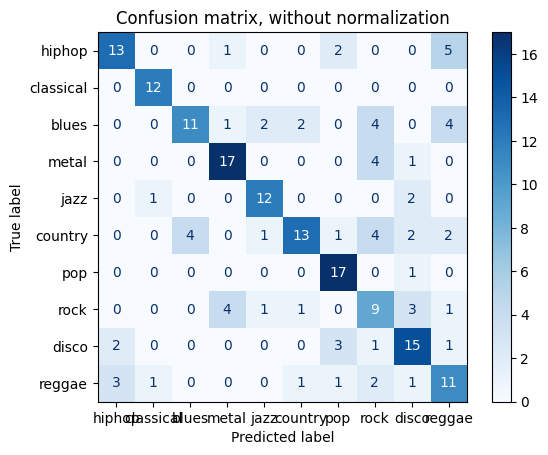

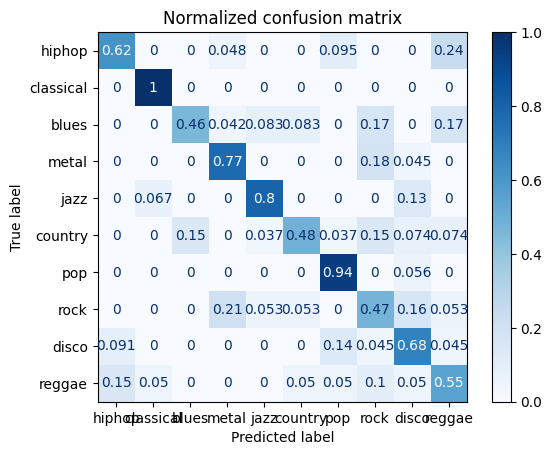

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
target_names = ['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']
classifier= model_11.fit(X_train, y_train)


titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [120]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=500)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  

array([0.00963347, 0.00669917, 0.00675239, 0.01340621, 0.0136997 ,
       0.01835351, 0.0196532 , 0.0227604 , 0.01735612, 0.01627204,
       0.01087582, 0.0152003 , 0.00976865, 0.01248296, 0.01191704,
       0.02136599, 0.01754954, 0.01034313, 0.01787615, 0.01622949,
       0.01590492, 0.01311084, 0.01485641, 0.01361483, 0.01243061,
       0.016509  , 0.00985885, 0.0108732 , 0.01183929, 0.01143955,
       0.00862026, 0.0127346 , 0.00872282, 0.01259859, 0.01064379,
       0.00962973, 0.00765336, 0.01068153, 0.0070795 , 0.00879632,
       0.00782809, 0.01328317, 0.00804166, 0.00892044, 0.00791274,
       0.00888055, 0.00904085, 0.00916197, 0.00903865, 0.00886035,
       0.01116421, 0.00803398, 0.01203334, 0.01149839, 0.0100079 ,
       0.00929359, 0.01016049, 0.00847142, 0.01054835, 0.00960719,
       0.01259072, 0.00842102, 0.01100588, 0.00789693, 0.01074636,
       0.00788343, 0.00980612, 0.0071031 , 0.01285283, 0.00722669,
       0.01361218, 0.0069269 , 0.01184034, 0.00719406, 0.01040

In [121]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new.shape   

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(799, 37)